In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore

from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import joblib

## Data Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy 
and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available 
(e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there 
are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are
relevant. So it could be interesting to test feature selection methods.

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine
quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the 
ROC curve and the AUC value.

You need to build a classification model. 


##### Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

##### Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

## Data Import

In [2]:
url = 'https://raw.githubusercontent.com/Bhushan0130/Datasets/main/winequality-red.csv'
df = pd.read_csv(url)
df.shape    # (1599, 12)

(1599, 12)

In [3]:
df.head(4)  # Top 4 rows

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6

In [4]:
df.sample(4)   # 4 Sample of rows

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
686             7.1              0.65         0.18             1.8      0.070   
956             9.0              0.36         0.52             2.1      0.111   
516            12.5              0.60         0.49             4.3      0.100   
1116            7.0              0.69         0.07             2.5      0.091   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
686                  13.0                  40.0  0.99700  3.44       0.60   
956                   5.0                  10.0  0.99568  3.31       0.62   
516                   5.0                  14.0  1.00100  3.25       0.74   
1116                 15.0                  21.0  0.99572  3.38       0.60   

      alcohol  quality  
686       9.1        5  
956      11.3        6  
516      11.9        6  
1116     11.3        6

In [5]:
df.tail(4)   # 4 button rows

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [6]:
df.shape   # (1599, 12)

(1599, 12)

## Checking datatypes of the columns

In [7]:
df.dtypes   # all columns are float type, except quality 

# fixed acidity           float64
# volatile acidity        float64
# citric acid             float64
# residual sugar          float64
# chlorides               float64
# free sulfur dioxide     float64
# total sulfur dioxide    float64
# density                 float64
# pH                      float64
# sulphates               float64
# alcohol                 float64
# quality                   int64

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
df.columns               # all columns name of dataset
# ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#        'pH', 'sulphates', 'alcohol', 'quality']

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
df.info()      # informatinn about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Conversion of quality column in two value 0 and 1

In [10]:
df.quality.unique()      # unique value of quality

# array([5, 6, 7, 4, 8, 3], dtype=int64)

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [11]:
df.quality.value_counts()          # count of variables 

# 5    681
# 6    638
# 7    199
# 4     53
# 8     18
# 3     10

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [12]:
df['quality'].replace( [7,8] , 1, inplace = True)           # 7, 8 replaced with 1
df['quality'].replace( [3, 4, 5, 6], 0, inplace = True)     # 3, 4, 5 , 6 replaced with 0
df['quality'].unique()

# array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

### Imablanced data analysis

In [13]:
df.quality.value_counts()
# 0 ----> 1382
# 1 ----> 217

0    1382
1     217
Name: quality, dtype: int64

In [14]:
float_col = df.select_dtypes(include = 'float64').keys()  # all columns name which are of float type

<AxesSubplot:xlabel='quality', ylabel='count'>

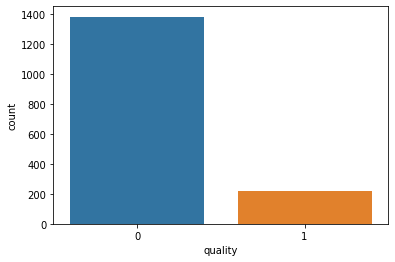

In [15]:
sns.countplot(df.quality)  #   Imbalanced dataset found 

### Null value analysis

In [16]:
df.isnull().sum().sum()  # No null value is present

0

<AxesSubplot:>

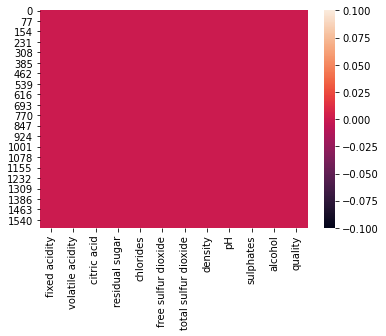

In [17]:
sns.heatmap(df.isnull())   # Heatmap for null value

### Outliers Analysis

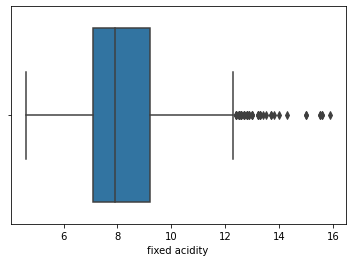

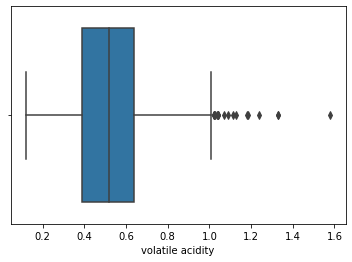

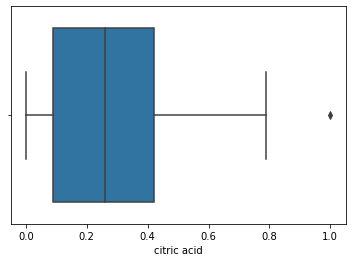

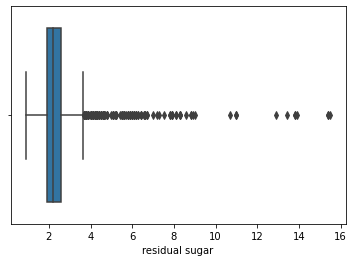

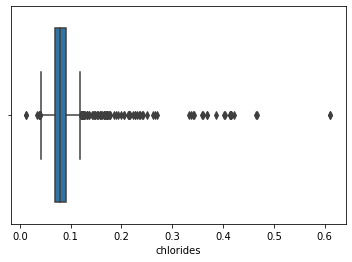

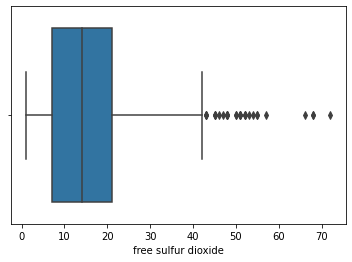

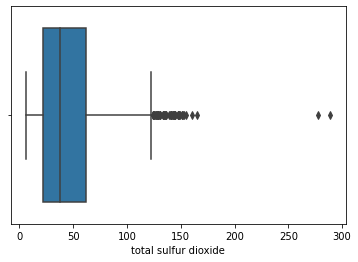

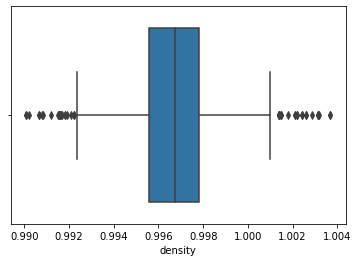

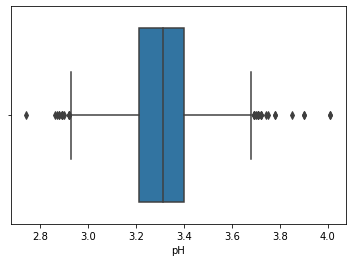

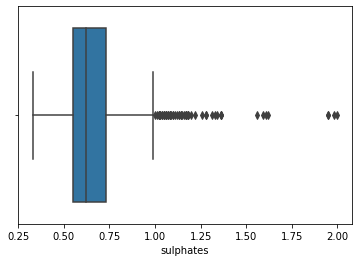

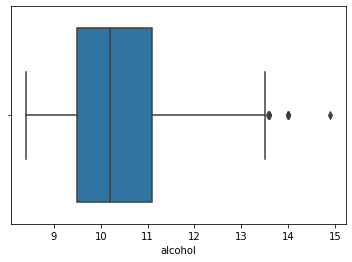

In [18]:
for i in float_col:
    plt.figure()
    sns.boxplot(df[i])   # Boxplot
    
# Outlier present in this data, need to work on it
# maximum outliers are present in the chloride columns
# every columns is contain outliers
# only citric acid is containing only few outliers

## Skewness analysis

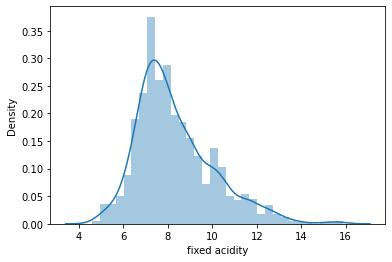

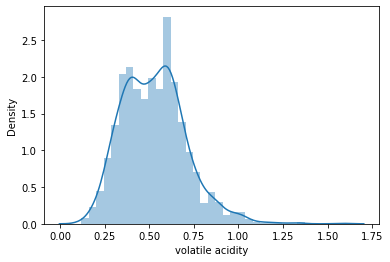

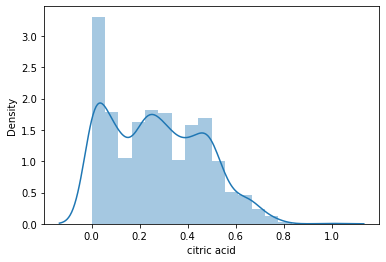

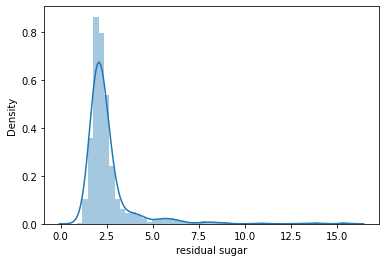

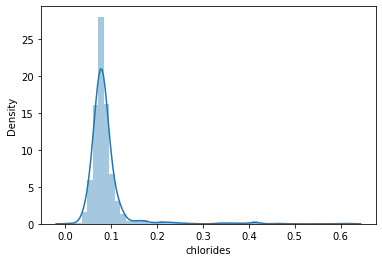

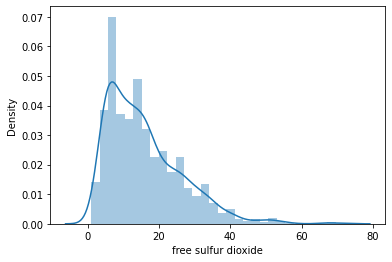

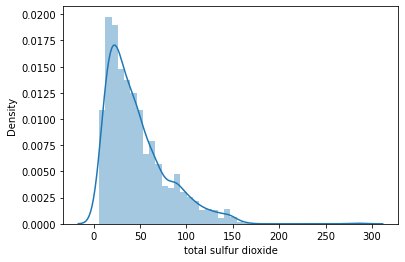

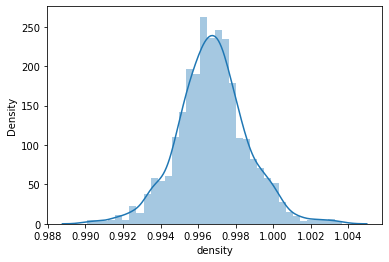

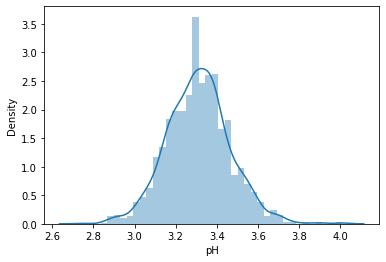

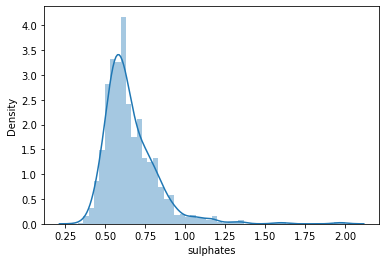

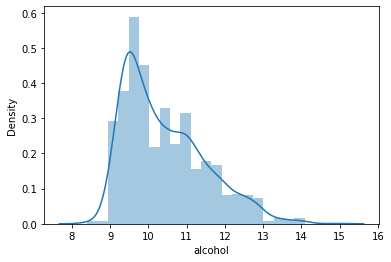

In [19]:
for i in float_col:
    plt.figure()
    sns.distplot(df[i])
    # Every columns containing skewness
    # Need to work on skewness

In [20]:
# free sulfar dioxide and total sulfur dioxide are highly skewed columns
# alocohal is also higly skewed

In [21]:
df.dtypes

# fixed acidity           float64
# volatile acidity        float64
# citric acid             float64
# residual sugar          float64
# chlorides               float64
# free sulfur dioxide     float64
# total sulfur dioxide    float64
# density                 float64
# pH                      float64
# sulphates               float64
# alcohol                 float64
# quality                 int64

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

0    1382
1     217
Name: quality, dtype: int64


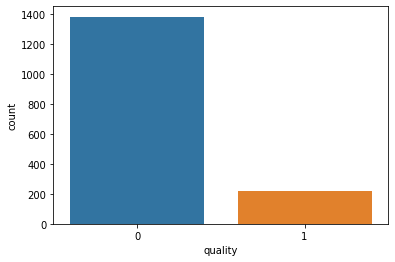

In [22]:
sns.countplot(x = 'quality', data = df)
print(df.quality.value_counts())
# Very high difference present between two classes

In [23]:
# From above observation the total number of 0 (Bad Quality) is 1382 and total number of 1 (Good Quality)
#  is 217

## Checking the distribution of the continuous value of the float type columns

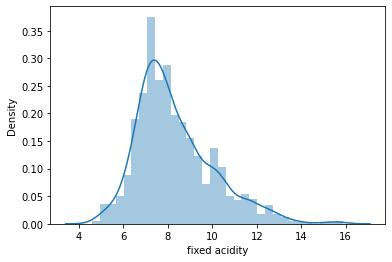

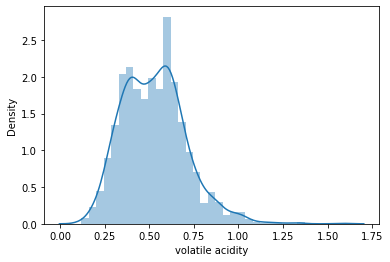

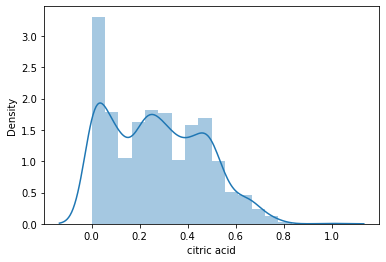

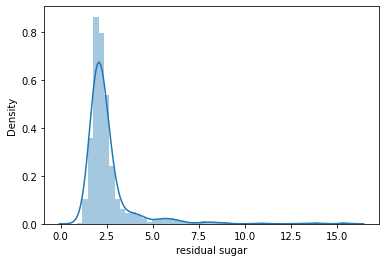

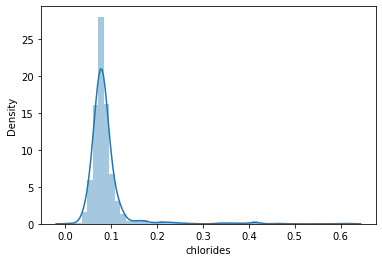

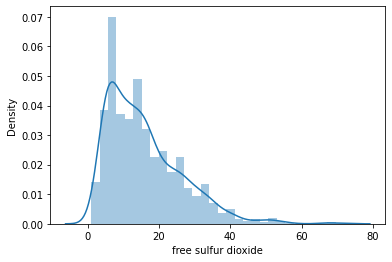

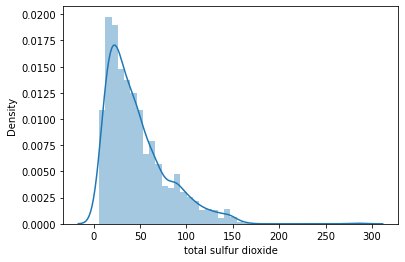

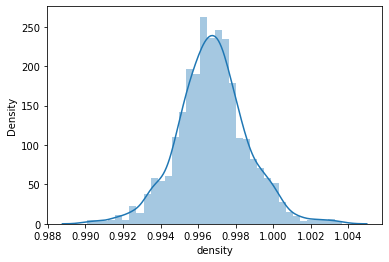

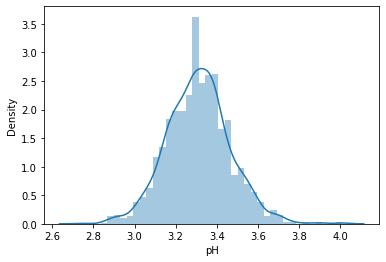

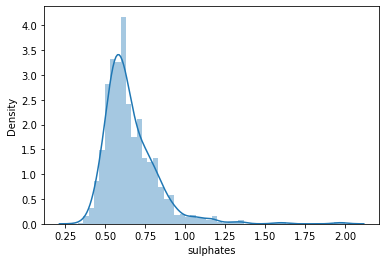

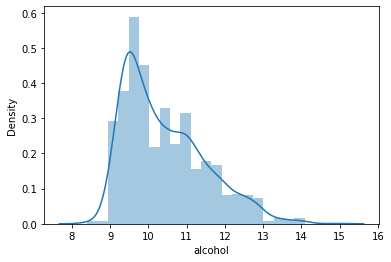

In [24]:
for i in float_col:
    plt.figure()
    sns.distplot(df[i], kde = True)

## Checking the spread of columns of the data

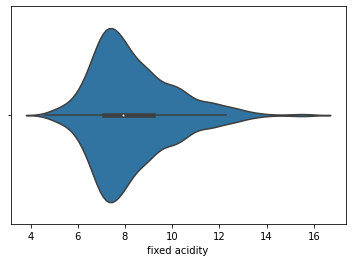

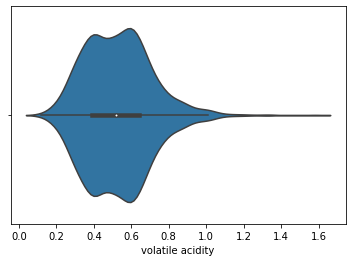

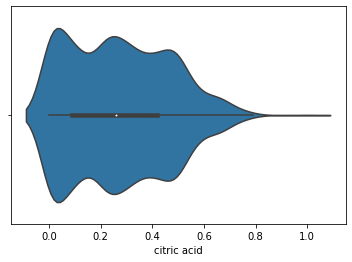

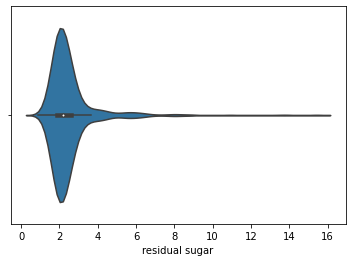

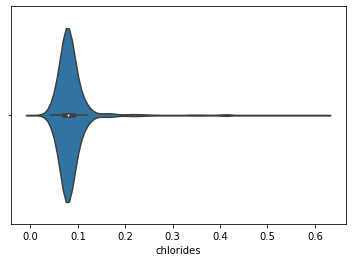

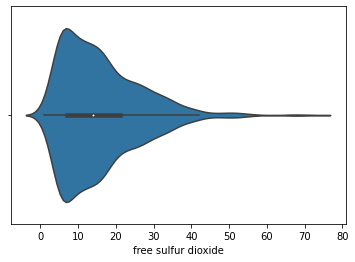

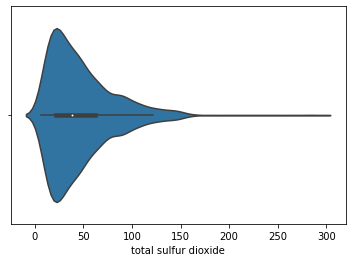

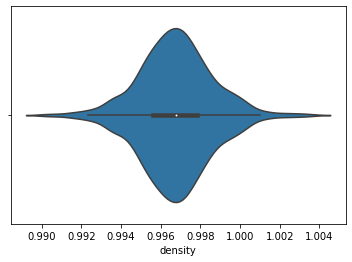

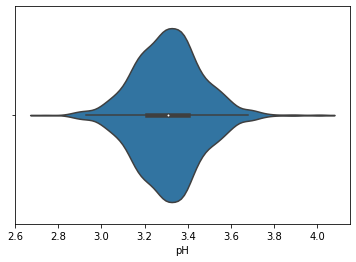

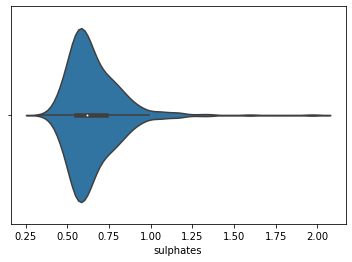

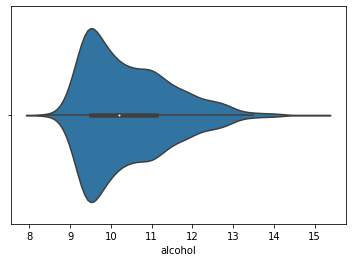

In [25]:
for i in float_col:    
    plt.figure()
    sns.violinplot(df[i], orient = 'vertical')
    
# We can see the relative frequencies here
# As we can see in the citric acid columns value, data is occuring almost with same frequencies 
# maximum values chlorides and residual columns are lying in the range of 0.15 to 0.20

### Bivariate Analysis

## Checking pattern of data, how they are connected with each other


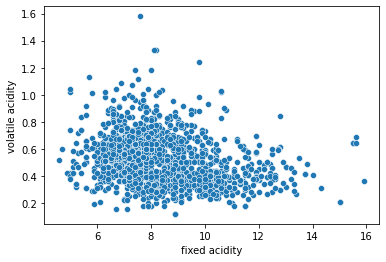

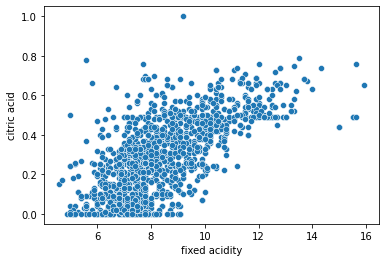

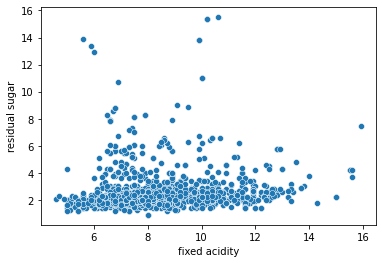

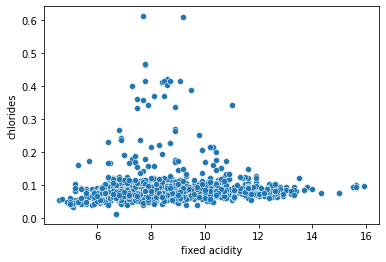

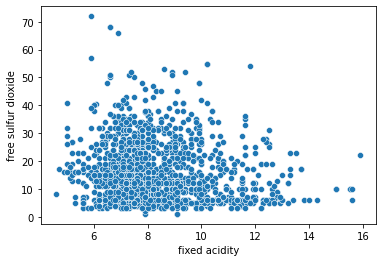

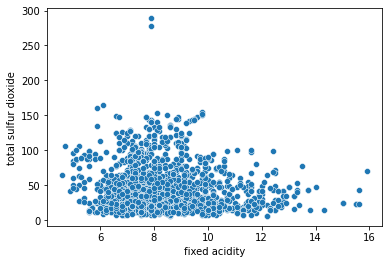

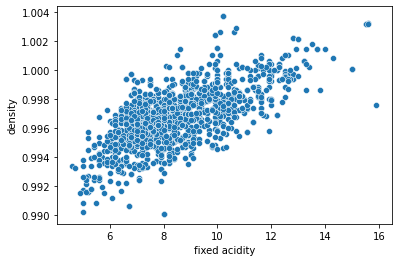

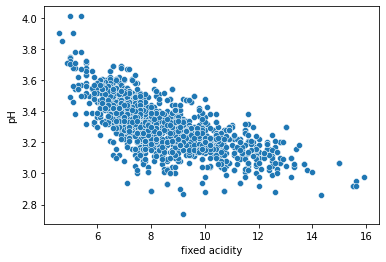

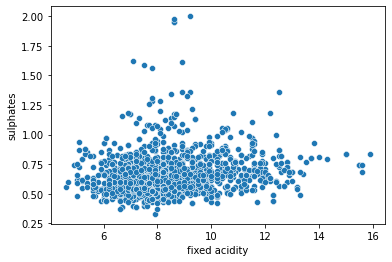

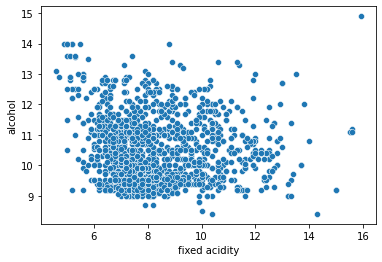

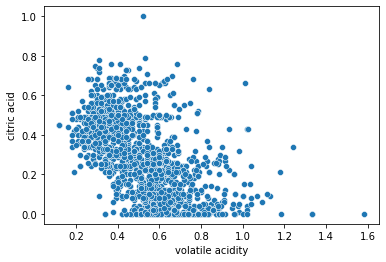

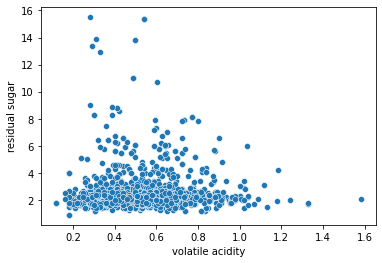

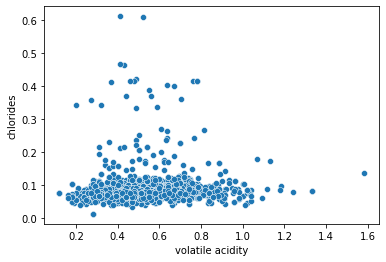

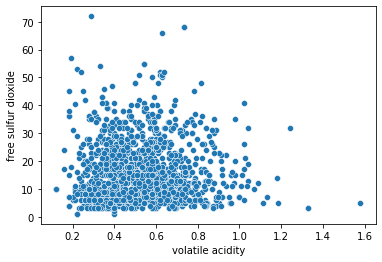

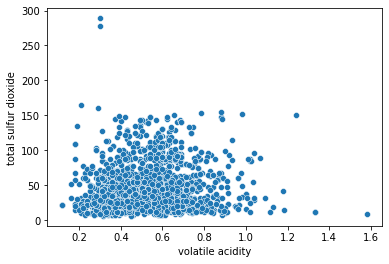

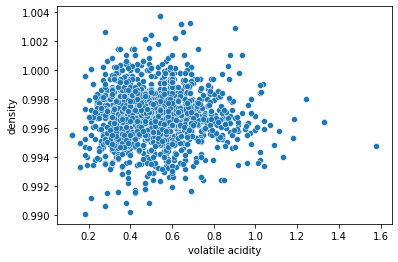

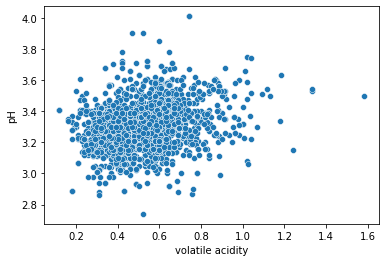

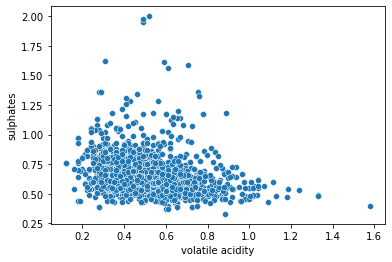

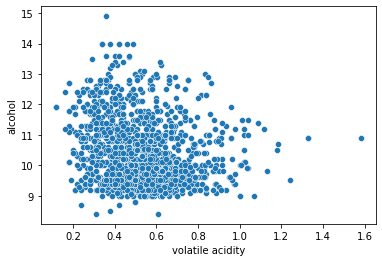

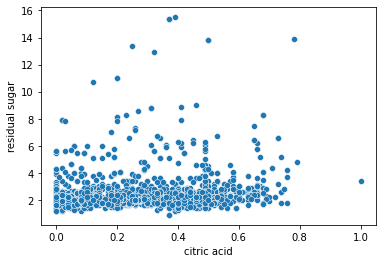

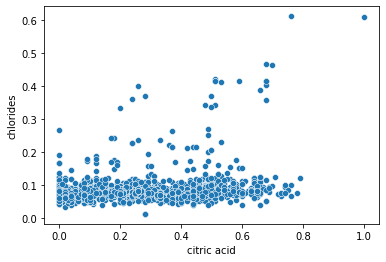

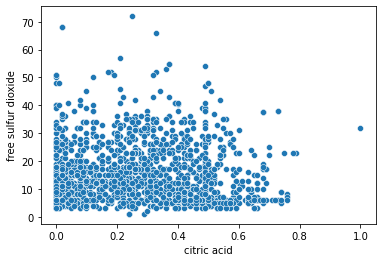

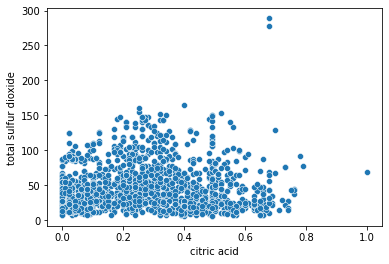

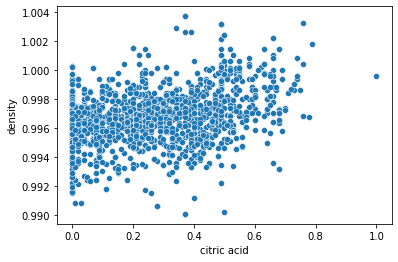

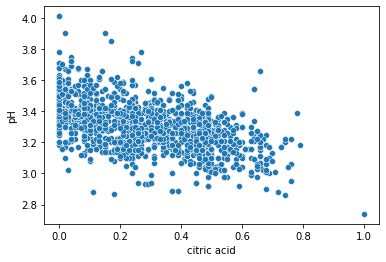

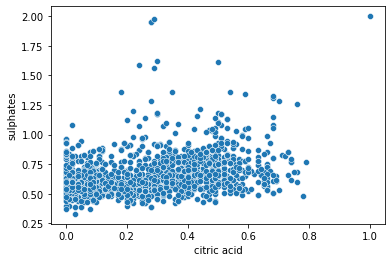

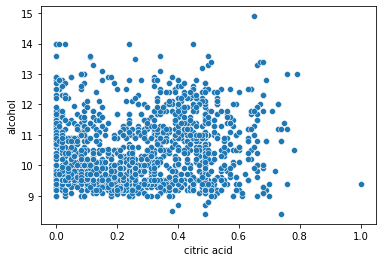

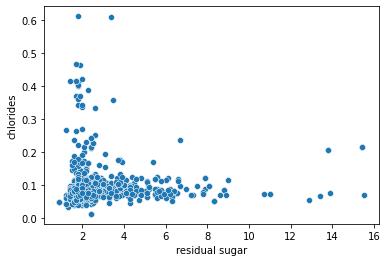

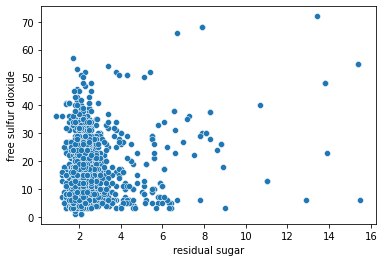

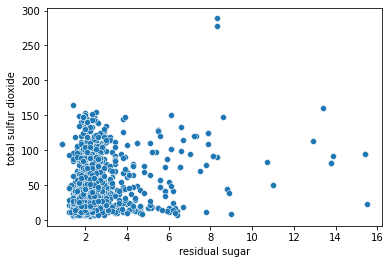

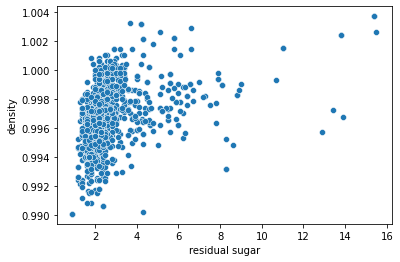

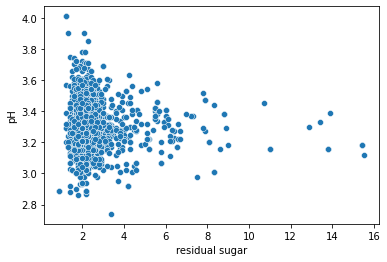

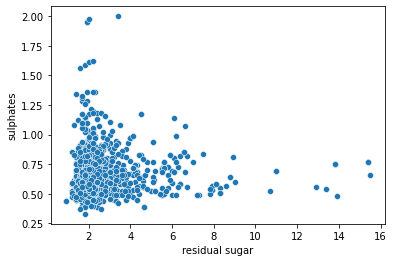

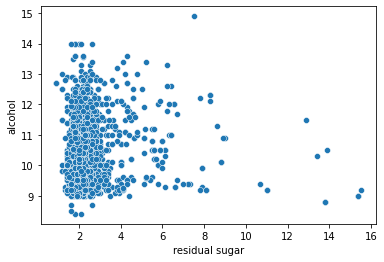

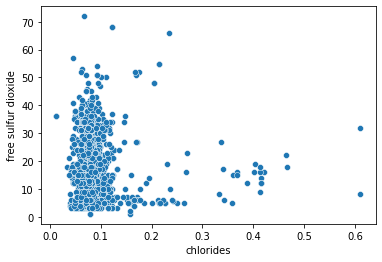

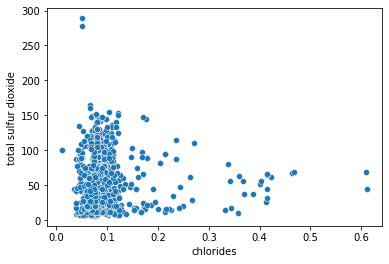

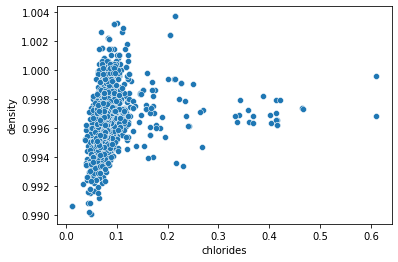

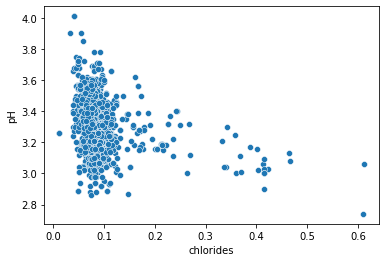

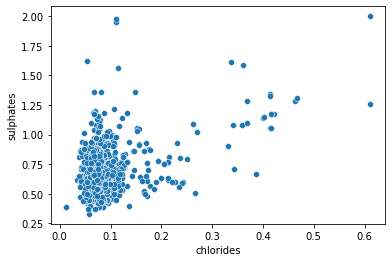

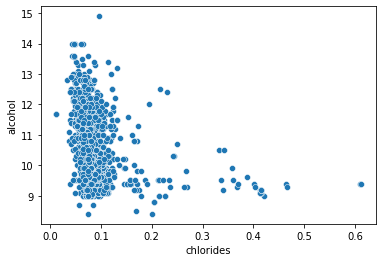

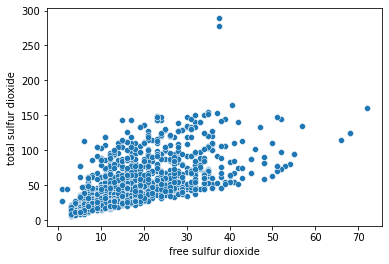

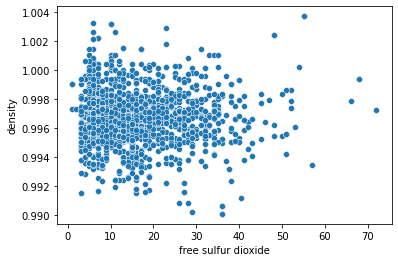

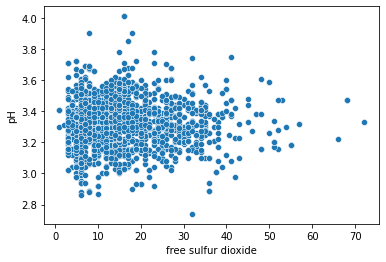

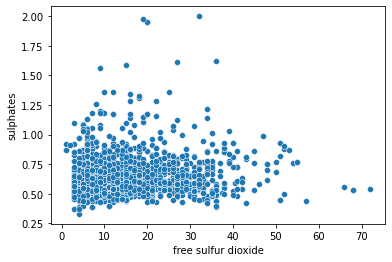

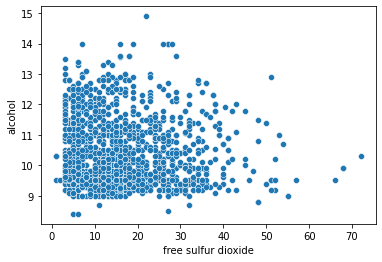

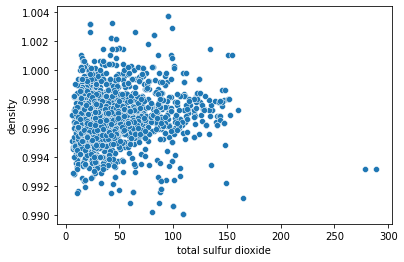

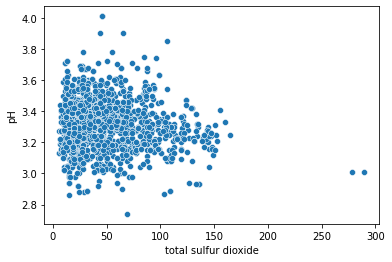

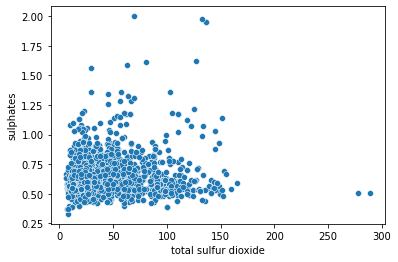

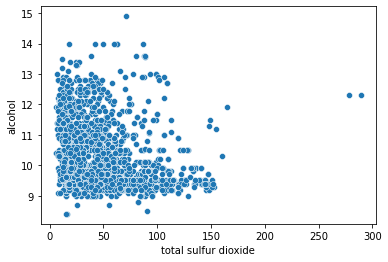

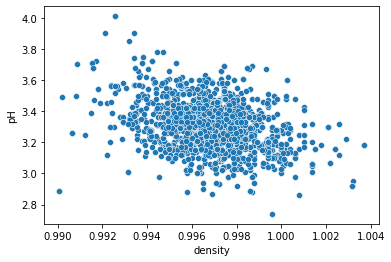

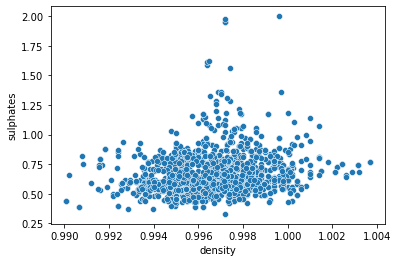

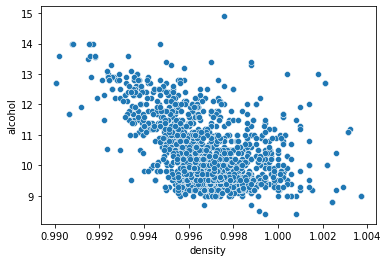

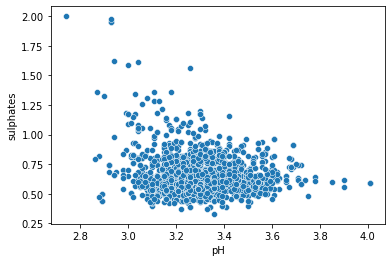

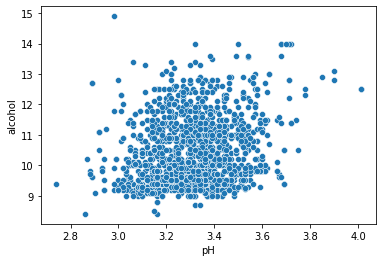

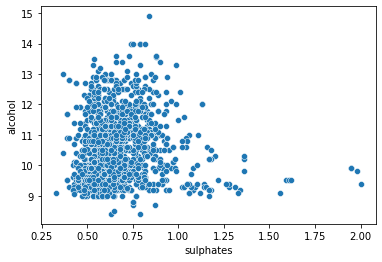

In [26]:
for i in range(len(float_col)):

    for j in float_col[i+1:]:    
        plt.figure()
        sns.scatterplot(df[float_col[i]], df[j])


In [27]:
# for i in range(len(float_col)):

#     for j in float_col[i+1:]:    
#         plt.figure()
#         sns.stripplot(df[float_col[i]], df[j])

In [28]:
# for i in range(len(float_col)):

#     for j in float_col[i+1:]:    
#         plt.figure()
#         sns.swarmplot(df[float_col[i]], df[j])
        
        # this jypyter cell will take time

In [29]:
# for i in range(len(float_col)):

#     for j in float_col[i+1:]:    
#         plt.figure()
#         plt.hexbin(x = float_col[i], y = j,data = df)
        
          # this jypyter cell will take time

In [30]:
# 1. This observation is telling the PH and fixed acidity columns are showing negative linear relation
# 2. Citric acid and fixed acidity are showing linear relation 
# 3. Density and fixed acidity are showing linear relation 
# 3. This plots help to choose model for ML to train our model.

## Correlation of the columns

In [31]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.120061         -0.270712     0.214716   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.047779  -0.097308            -0.071747   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.139517 -0.150460 -0.057283   0.199485   

                       alcohol   quality  
fixed acidity        -0.061668  0.120061  
volatile acidity     -0.202288 -0.270712  
citric acid           0.109903  0.214716  
residual sugar        0.042075  0.047779  
chlorides            -0.221141 -0.097308  
free sulfur dioxide  -0.069408 -0.071747  
total sulfur dioxide -0.205654 -0.139517  
density              -0.496180 -0.150460  
pH                    0.205633 -0.057283  
sulphates             0.093595  0.199485  
alcohol               1.000000  0.407315  
quality               0.407315  1.000000

<AxesSubplot:>

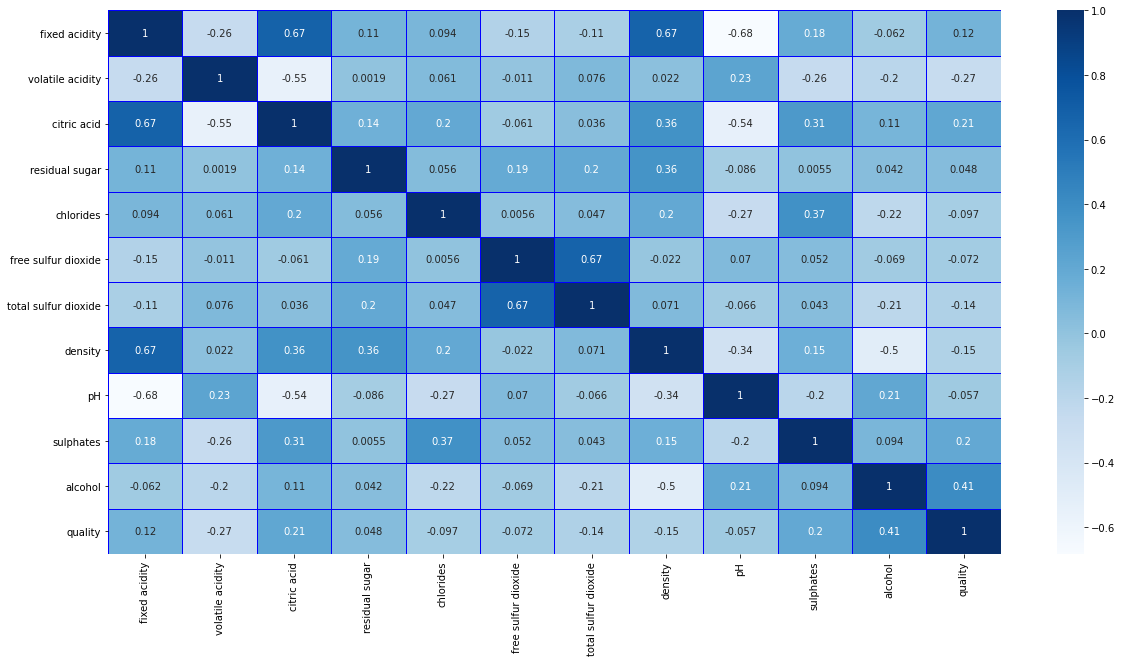

In [32]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', linewidth = 0.5, linecolor = 'blue' )   # Heatmap with number, 
# volatile acidity and fixed acidity are showing strong correlation
# density and fixed acidity are showing strong correlation

# Multicolinearity found

## Describe data

In [33]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     0.135710  
std       0.154386     0.169507     1.065668     0.342587  
min       2.740000     0.330000     8.400000     0.000000  
25%       3.210000     0.550000     9.500000     0.000000  
50%       3.310000     0.620000    10.200000     0.000000  
75%       3.400000     0.730000    11.100000     0.000000  
max       4.010000     2.000000    14.900000     1.000000

<AxesSubplot:>

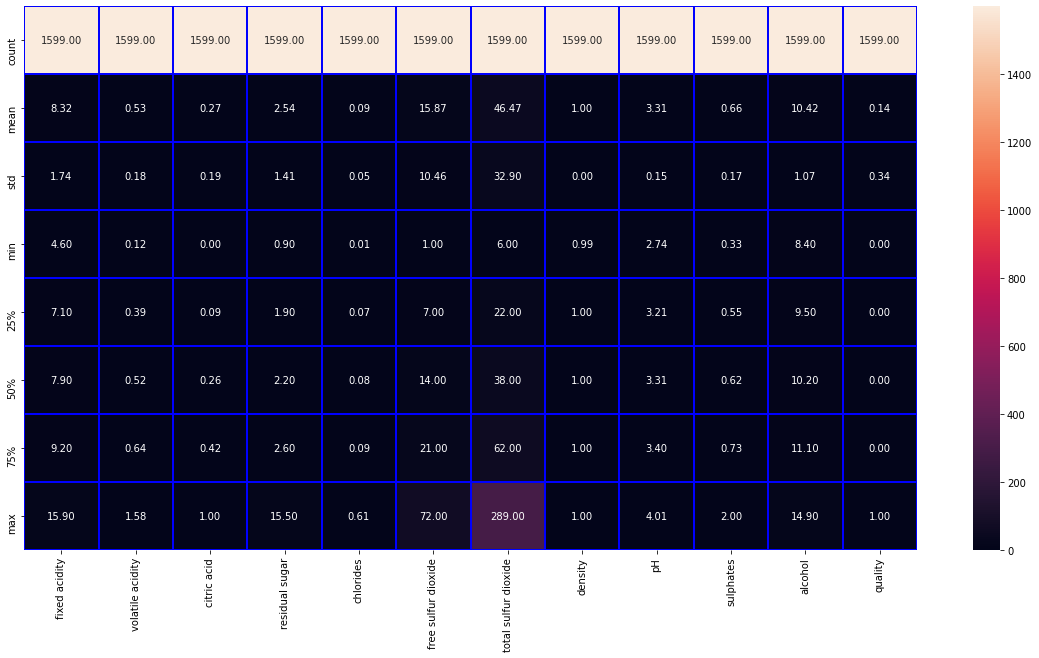

In [34]:
plt.figure(figsize = (20, 10))

sns.heatmap(df.describe(), annot = True, linewidth = 0.05, linecolor = 'blue', fmt = "0.2f")

In [35]:
# mean and 50 percentile are not same mean data is skewed
# free sulfur dioxide is highly spread, as difference is so high between min and max of this column
# total sulfer dioxide is also higly spread as difference is so high between min and max
# citric acid is less spread 

## Checking the columns which are positively and negative correlated with the target columns

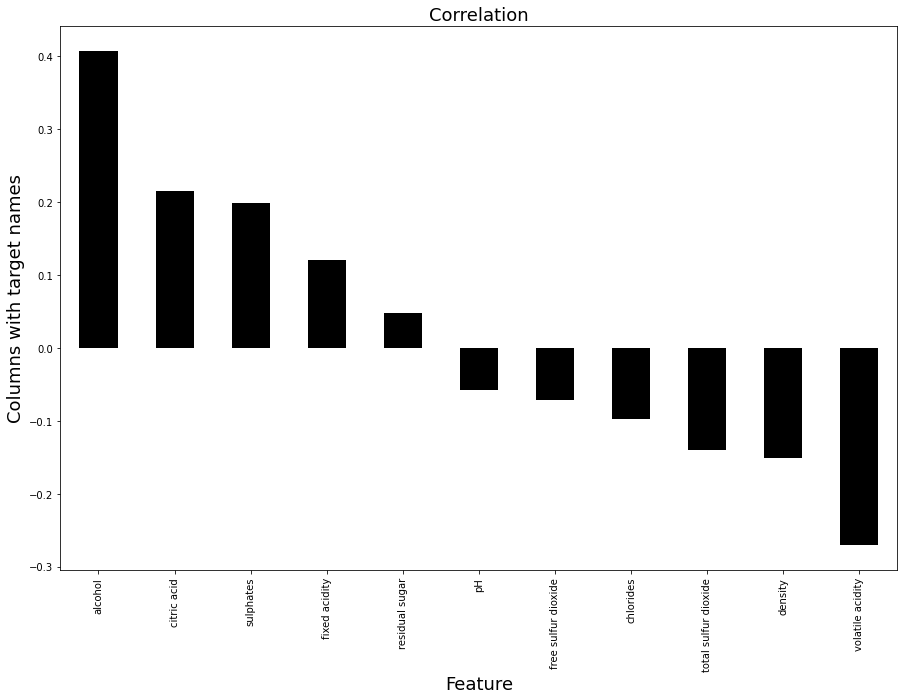

In [36]:
plt.figure(figsize = (15, 10))
df.corr()['quality'].sort_values(ascending = False).drop(['quality']).plot(kind = 'bar', color = 'black')
plt.xlabel( 'Feature', fontsize = 18)
plt.ylabel( 'Columns with target names', fontsize = 18)
plt.title ('Correlation', fontsize = 18)
plt.show()

In [37]:
# impecting positively on quality  
# 1. alcohol
# 2. citric acid
# 3. sulphates
# 4. fixed acidity
# 5. residual sugar


# impecting negatively on quality 
# 1. ph
# 2. free sulfur dioxide
# 3. chlorides
# 4. total sulfer dioxide
# 5. density
# 6. volatuke acidity

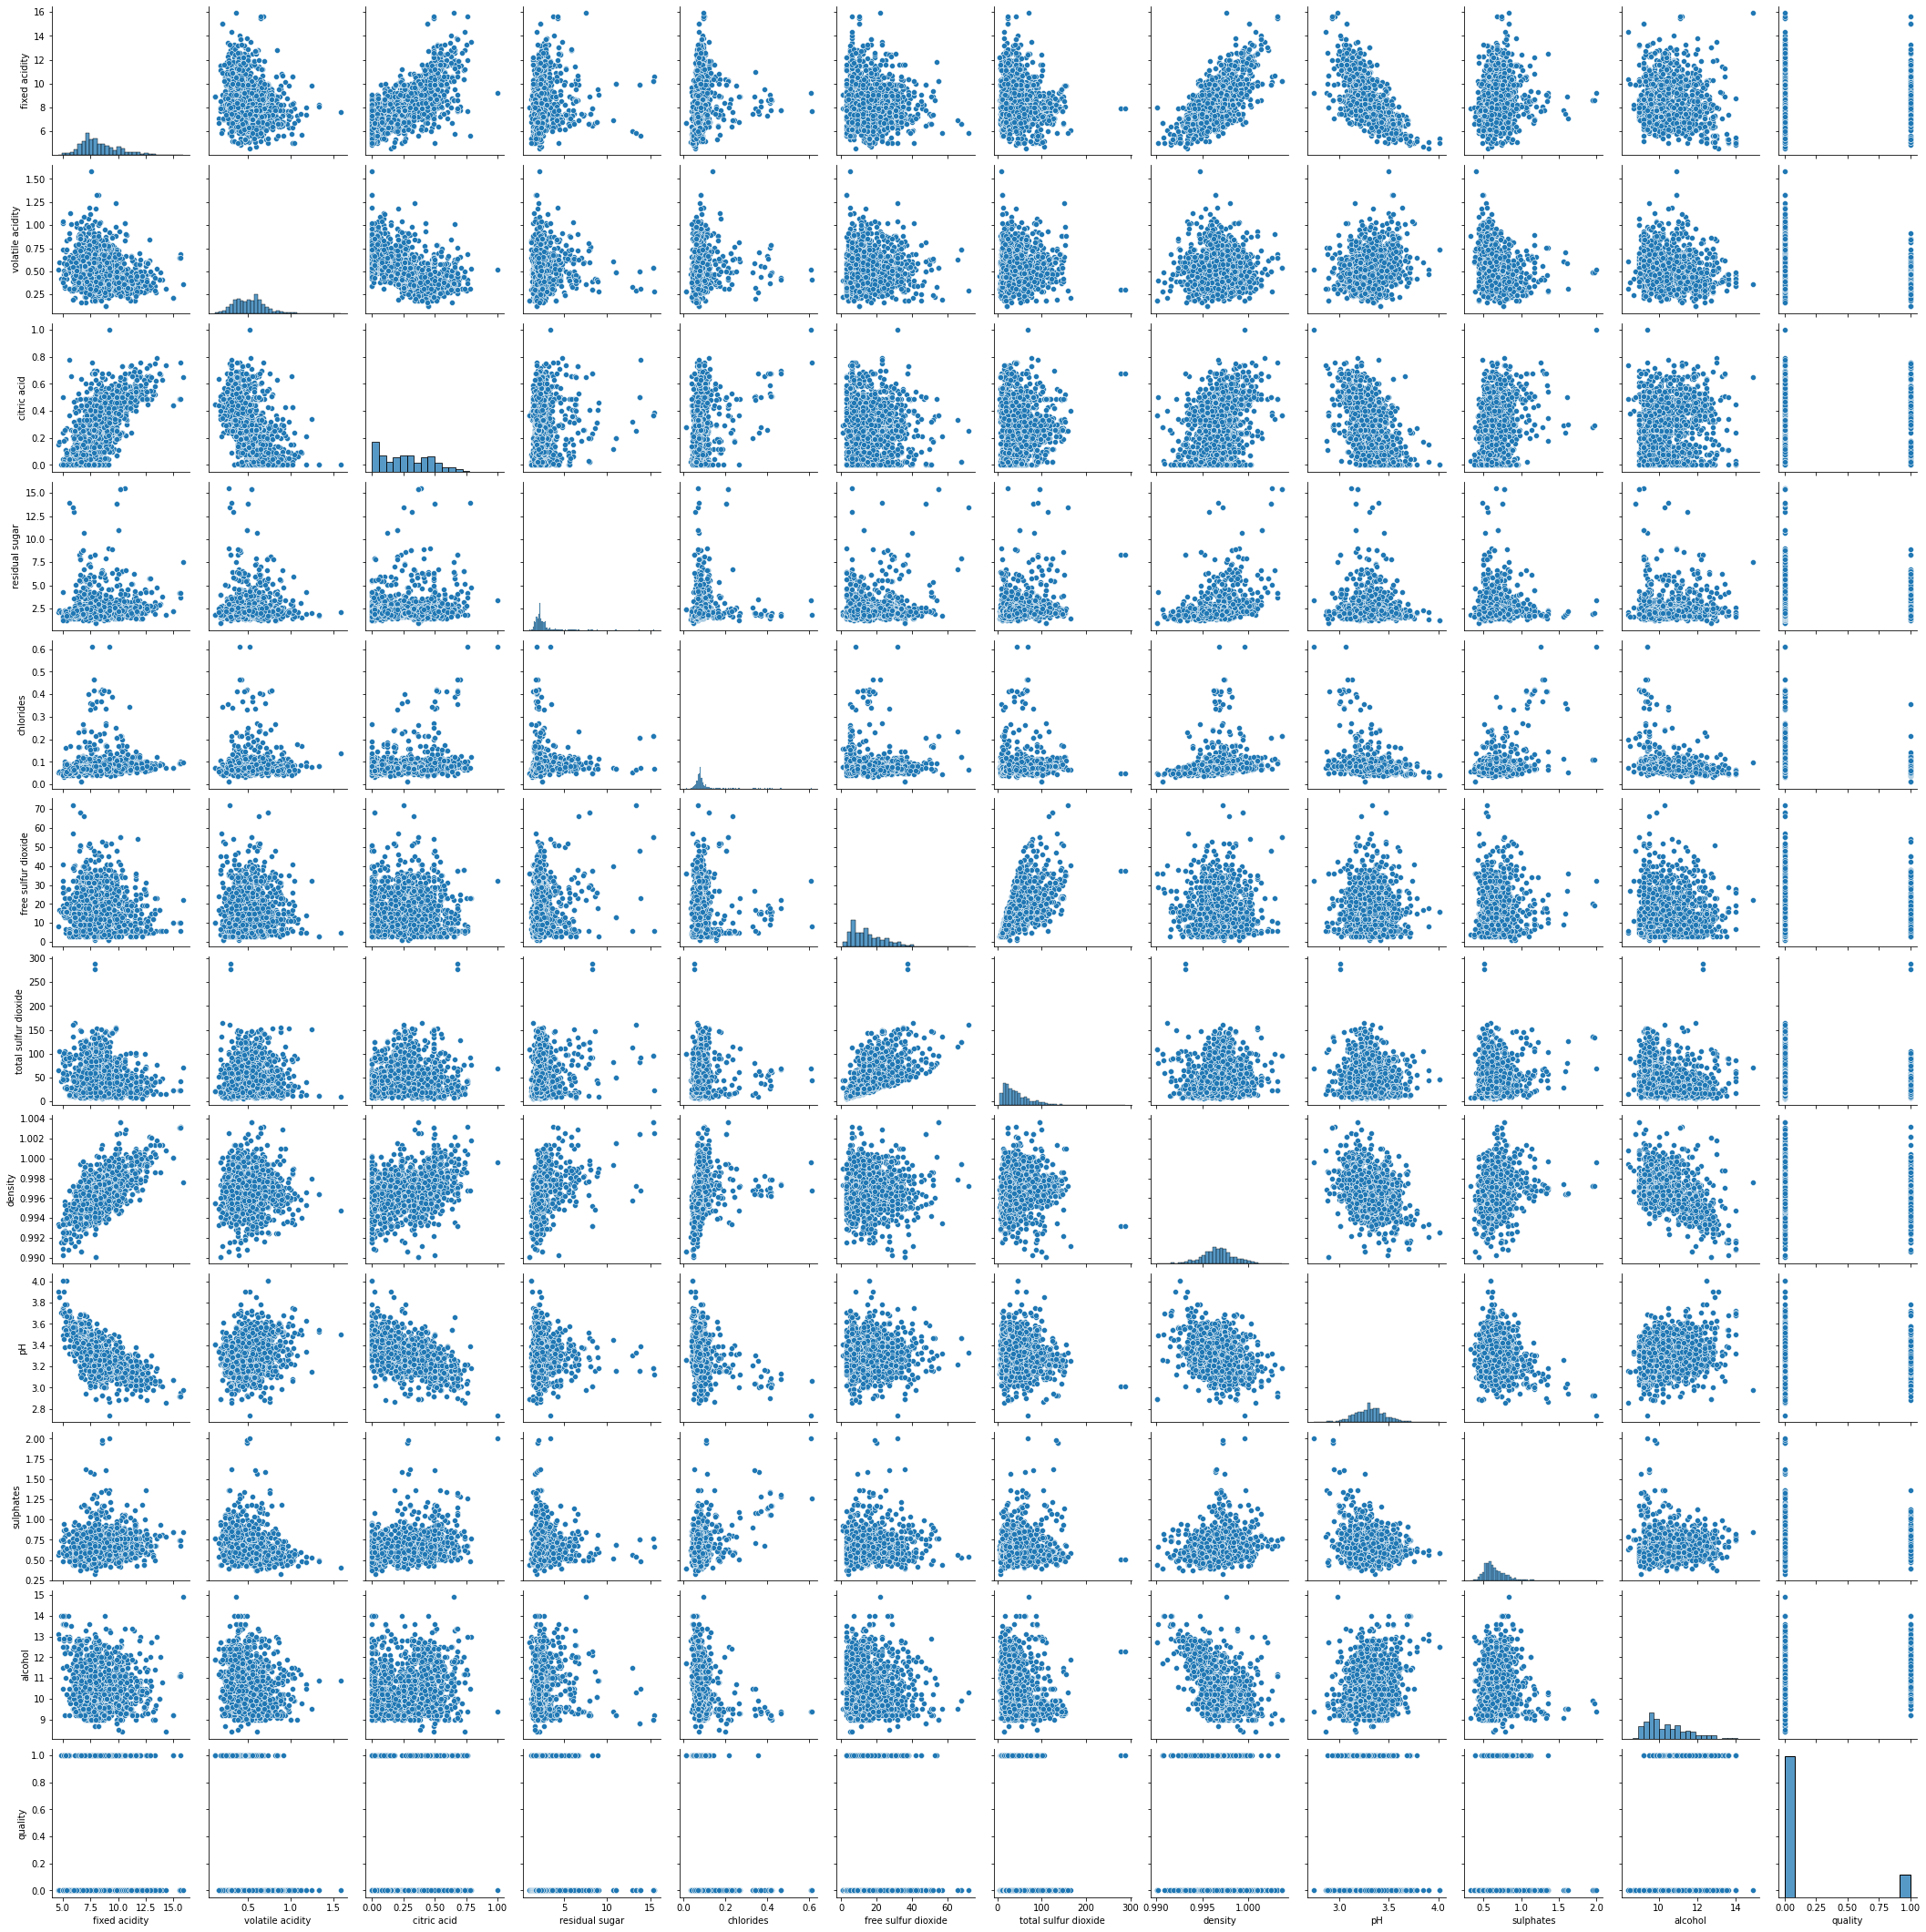

In [38]:
sns.pairplot(df)
# Data is highly spreaded 
# here KNeighbor or RandomForestmodel will work good 
# Only few columns are showing linear relation with each other
# data is imbalanced

## Removing outlier etc

### zscore

In [39]:
from scipy.stats import zscore   # Importing zscore

In [40]:
z = np.abs(zscore(df))
df_z = df[(z < 3).all(axis = 1)]  # operation to calculate zscore

In [41]:
df_z.shape  # (1458, 12)

(1458, 12)

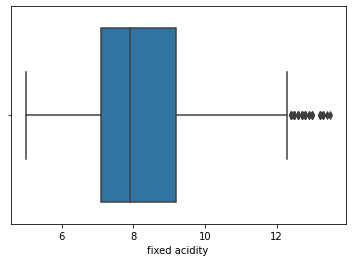

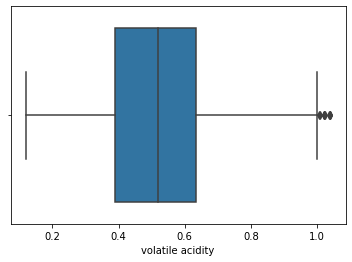

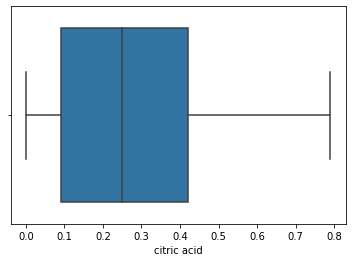

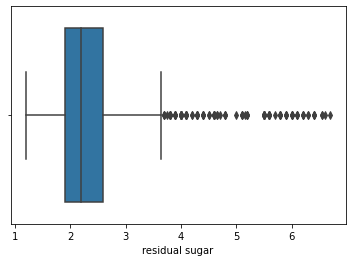

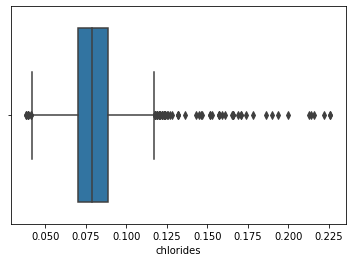

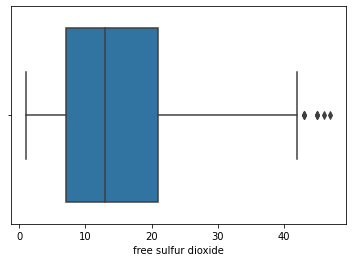

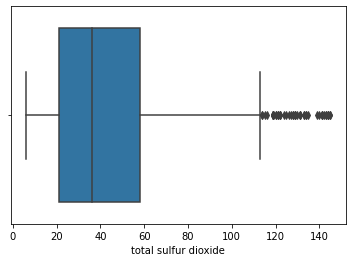

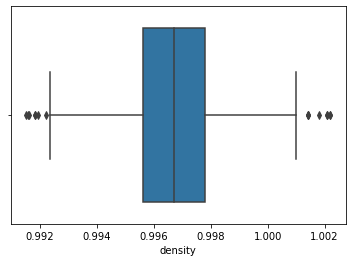

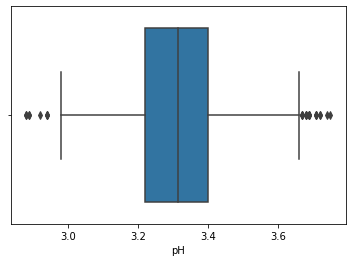

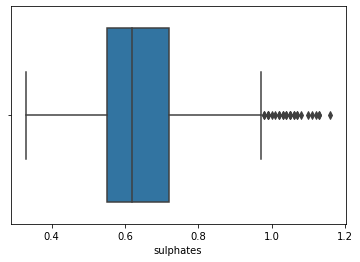

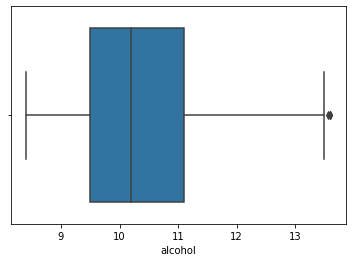

In [42]:
for i in float_col:
    plt.figure()
    sns.boxplot(df_z[i])

In [43]:
(df.shape[0] - df_z.shape[0])/df.shape[0] * 100  

8.818011257035648

In [44]:
# almost 9 % data loss we are getting by using zscore method, which is not acceptable therefore 
# we i have used another method to remove oultliers
# As we can observed all outliers is not removed from the datset

### IQR

In [45]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [46]:
df_IQR = df[~((df < (Q1 - 1.5*IQR) ) | (df > (Q3 + 1.5*IQR) )).any(axis = 1) ] 
df_IQR.shape  # (1047, 12)

(1047, 12)

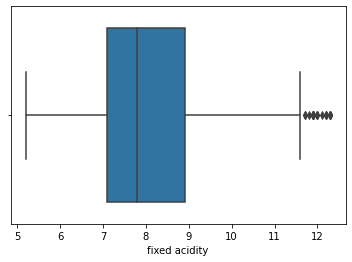

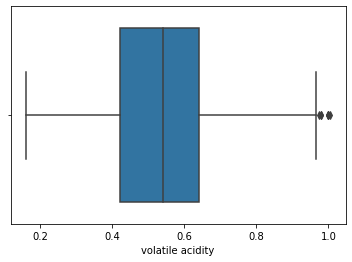

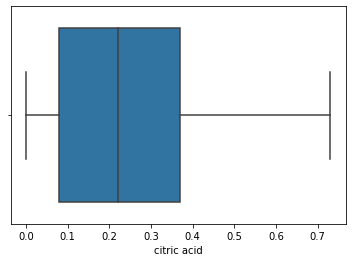

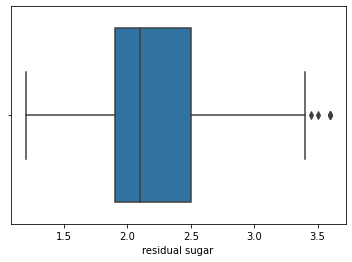

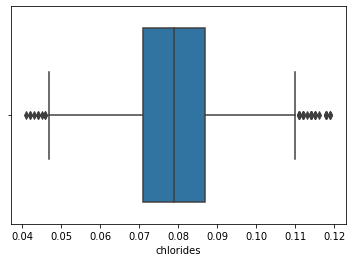

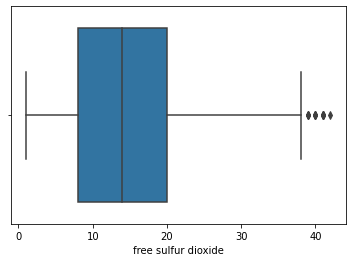

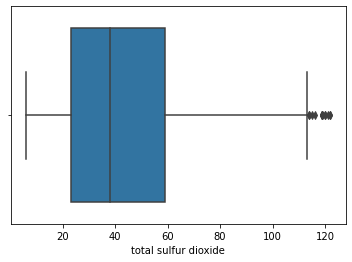

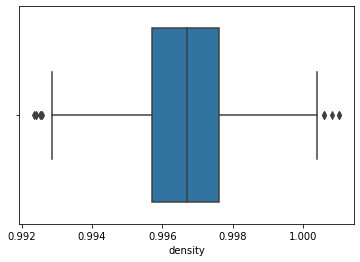

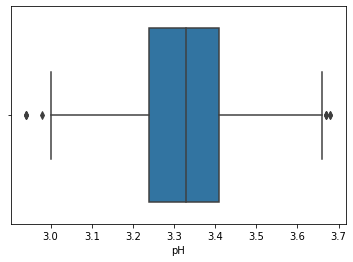

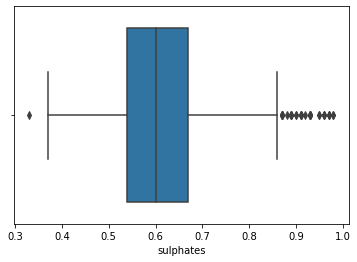

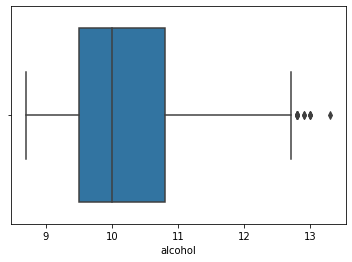

In [47]:
for i in float_col:
    plt.figure()
    sns.boxplot(df_IQR[i])

In [48]:
((df.shape[0] - df_IQR.shape[0]) / df.shape[0] ) * 100   
# almost 34 % data loss we are getting by using IQR method
# Not all outliers are removed from the dataset

34.52157598499062

In [49]:
# Both methods (zscore and IQR) are giving data loss which are not in acceptable range, therefore 
# we will not remove outliers, and leave data as it is.

## Seperate data into x and y form

In [50]:
x = df.iloc[:,0: -1]
y = df.iloc[:, -1]
print('shape of x', x.shape)
print('shape of y', y.shape)

# shape of x (1599, 11)
# shape of y (1599,)

shape of x (1599, 11)
shape of y (1599,)


## Removing Skewness

In [51]:
x.skew()  
# as we can see Chlorides, residual sugar, sulphates , free sulfur dioxide, and total sulfur dioxide 
# are highly skewed
# as residual sugar and chlorides is highly skewed data

# fixed acidity           0.982751
# volatile acidity        0.671593
# citric acid             0.318337
# residual sugar          4.540655
# chlorides               5.680347
# free sulfur dioxide     1.250567
# total sulfur dioxide    1.515531
# density                 0.071288
# pH                      0.193683
# sulphates               2.428672
# alcohol                 0.860829
# dtype: float64

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

In [52]:
# +/-0.5 as the range for skewness, here the columns which does not lie within this range
# fixed acidity
# volatile acidity
# residual sugar
# residual sugar
# free sulfur dioxide
# total sulfur dioxide
# total sulfur dioxide

In [53]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer( 'yeo-johnson')

In [54]:
data = pt.fit_transform(x) # applying skew to the whole x dataset

In [55]:
x = pd.DataFrame(data, columns = x.columns)   # Converting array into dataframe

In [56]:
x.skew()

# fixed acidity           0.002529
# volatile acidity        0.003099
# citric acid             0.017788
# residual sugar         -0.015715
# chlorides              -0.151304
# free sulfur dioxide    -0.009948
# total sulfur dioxide   -0.003752
# density                -0.005054
# pH                     -0.002823
# sulphates               0.009985
# alcohol                 0.112372
# dtype: float64

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
dtype: float64

## Removing Multicolinearity

###  Using VIF(Variance Inflation Factor)

<AxesSubplot:>

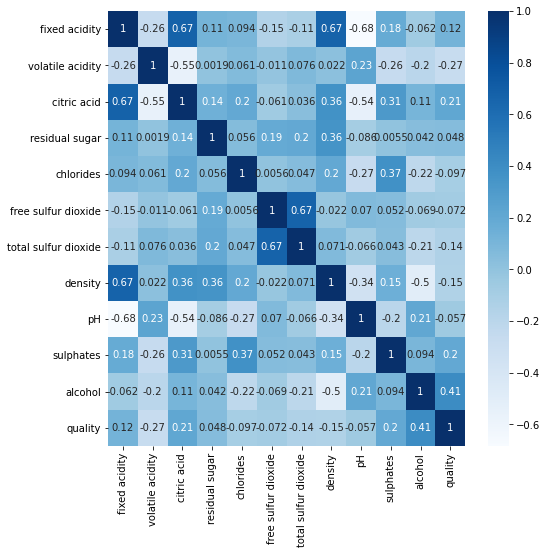

In [57]:
plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')  
# for reference only and this heatmap already explained above

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
def cal_vif(data):    # function to check vif
    vif = pd.DataFrame()
    vif['Feature Name'] = x.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range (data.shape[1])]
    return (vif)   

In [60]:
cal_vif(x)  
# Only fixed acidity and density columns is showing VIF 6.498 and 5.968 respectively, which are not in accepatble range

Feature Name       VIF
0          fixed acidity  6.498474
1       volatile acidity  1.892941
2            citric acid  2.910788
3         residual sugar  1.783555
4              chlorides  1.382009
5    free sulfur dioxide  2.858944
6   total sulfur dioxide  3.203404
7                density  5.968698
8                     pH  3.099578
9              sulphates  1.353120
10               alcohol  2.765502

In [61]:
# As per observation Fixed acidity and density are showing high VIF
# They both showing strong correlation with each other
# Fixed acidity is contributing towards Quality with value of 0.12
# density is contributing towards Quality with value of -0.15 
# hence density is less contributing towards y as compare to Fixed acidity , we can observed from the above heatmap


In [62]:
x.drop(columns = ['density'], axis = 1, inplace = True)  # density columns removed from the x data

In [63]:
cal_vif(x)  # VIF values are under 5 which is acceaptable 


# Feature Name	VIF
# 0	fixed acidity	2.888835
# 1	volatile acidity	1.853601
# 2	citric acid	2.906691
# 3	residual sugar	1.196962
# 4	chlorides	1.346695
# 5	free sulfur dioxide	2.843138
# 6	total sulfur dioxide	3.187647
# 7	pH	2.271873
# 8	sulphates	1.238109
# 9	alcohol	1.447798

Feature Name       VIF
0         fixed acidity  2.888835
1      volatile acidity  1.853601
2           citric acid  2.906691
3        residual sugar  1.196962
4             chlorides  1.346695
5   free sulfur dioxide  2.843138
6  total sulfur dioxide  3.187647
7                    pH  2.271873
8             sulphates  1.238109
9               alcohol  1.447798

## Balancing the data

### Using SMOTE (Synthetic Minority Over-Sampling Technique)

0    1382
1     217
Name: quality, dtype: int64

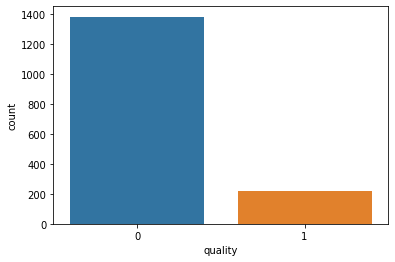

In [64]:
sns.countplot(y)
y.value_counts()

# 0    1382
# 1     217

In [65]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x, y = smt.fit_resample(x, y)

0    1382
1    1382
Name: quality, dtype: int64

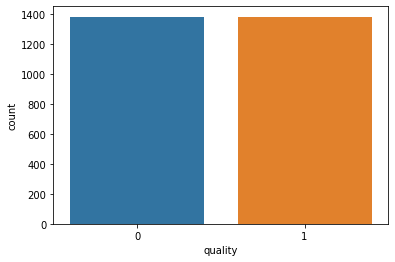

In [66]:
sns.countplot(y)
y.value_counts()

# Now its become balanced
# 0    1382
# 1    1382

## Standard Scaling 

In [67]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [68]:
x_scaler = ss.fit_transform(x)   #  fitting and transforming the x dataset

In [69]:
x = pd.DataFrame(x_scaler, columns = x.columns)

In [70]:
x.head(4)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.543538          1.285510    -1.738388       -0.680671  -0.019924   
1      -0.274212          2.056461    -1.738388        0.510327   0.924819   
2      -0.274212          1.558071    -1.465620        0.093071   0.702686   
3       1.337668         -1.244308     1.159506       -0.680671  -0.072344   

   free sulfur dioxide  total sulfur dioxide        pH  sulphates   alcohol  
0            -0.182269              0.068418  1.365766  -0.921769 -1.504634  
1             1.109109              1.071181 -0.669703   0.128376 -0.929104  
2             0.290008              0.749106 -0.260126  -0.098866 -0.929104  
3             0.486151              0.906074 -0.947192  -0.718218 -0.929104

## Machine Learning Model

In [71]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Model 1  :  DecisionTreeClassifier()

In [72]:
for i in range(0, 200 ) :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model1 = DecisionTreeClassifier()
    model1.fit(x_train, y_train)
    model1_predict_train = model1.predict(x_train)
    model1_predict_test = model1.predict(x_test)
    
    print('At random state', i, 'the training accuracy is :-', accuracy_score(model1_predict_train, y_train))
    print('At random state', i, 'the training accuracy is :-', accuracy_score(model1_predict_test, y_test)) 
    print('\n')

At random state 0 the training accuracy is :- 1.0
At random state 0 the training accuracy is :- 0.8939759036144578


At random state 1 the training accuracy is :- 1.0
At random state 1 the training accuracy is :- 0.8951807228915662


At random state 2 the training accuracy is :- 1.0
At random state 2 the training accuracy is :- 0.8843373493975903


At random state 3 the training accuracy is :- 1.0
At random state 3 the training accuracy is :- 0.8939759036144578


At random state 4 the training accuracy is :- 1.0
At random state 4 the training accuracy is :- 0.8951807228915662


At random state 5 the training accuracy is :- 1.0
At random state 5 the training accuracy is :- 0.9120481927710843


At random state 6 the training accuracy is :- 1.0
At random state 6 the training accuracy is :- 0.8987951807228916


At random state 7 the training accuracy is :- 1.0
At random state 7 the training accuracy is :- 0.8927710843373494


At random state 8 the training accuracy is :- 1.0
At random stat

At random state 73 the training accuracy is :- 1.0
At random state 73 the training accuracy is :- 0.9012048192771084


At random state 74 the training accuracy is :- 1.0
At random state 74 the training accuracy is :- 0.9012048192771084


At random state 75 the training accuracy is :- 1.0
At random state 75 the training accuracy is :- 0.8831325301204819


At random state 76 the training accuracy is :- 1.0
At random state 76 the training accuracy is :- 0.9120481927710843


At random state 77 the training accuracy is :- 1.0
At random state 77 the training accuracy is :- 0.8903614457831325


At random state 78 the training accuracy is :- 1.0
At random state 78 the training accuracy is :- 0.8951807228915662


At random state 79 the training accuracy is :- 1.0
At random state 79 the training accuracy is :- 0.8975903614457831


At random state 80 the training accuracy is :- 1.0
At random state 80 the training accuracy is :- 0.9036144578313253


At random state 81 the training accuracy is :- 1

At random state 143 the training accuracy is :- 1.0
At random state 143 the training accuracy is :- 0.9


At random state 144 the training accuracy is :- 1.0
At random state 144 the training accuracy is :- 0.8939759036144578


At random state 145 the training accuracy is :- 1.0
At random state 145 the training accuracy is :- 0.8951807228915662


At random state 146 the training accuracy is :- 1.0
At random state 146 the training accuracy is :- 0.8939759036144578


At random state 147 the training accuracy is :- 1.0
At random state 147 the training accuracy is :- 0.908433734939759


At random state 148 the training accuracy is :- 1.0
At random state 148 the training accuracy is :- 0.8879518072289156


At random state 149 the training accuracy is :- 1.0
At random state 149 the training accuracy is :- 0.8855421686746988


At random state 150 the training accuracy is :- 1.0
At random state 150 the training accuracy is :- 0.9012048192771084


At random state 151 the training accuracy is :- 

In [73]:
max_acc1 = 0
random_s1 = 0

for i in range(300):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model1 = DecisionTreeClassifier()
    model1.fit(x_train, y_train)
    model1_predict = model1.predict(x_test)
    acc = accuracy_score(model1_predict, y_test)
    
    if acc > max_acc1:
        max_acc1 = acc
        random_s1 = i
print('Model is giving best accurancy', max_acc1, 'on random state of', random_s1 )

Model is giving best accurancy 0.9289156626506024 on random state of 38


In [74]:
# Model is overfitted 
# As the differnce between training and testing is so high, therefore Model is overfitted

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = random_s1)

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_predict_test = dtc.predict(x_test)
dtc_predict_train = dtc.predict(x_train)
print('accuracy_score of test data: ', accuracy_score(dtc_predict_test,  y_test))
print('accuracy_score of train data: ', accuracy_score(dtc_predict_train,  y_train))
print('classification_report: ', classification_report(dtc_predict_test,  y_test))
print('confusion_matrix: ', confusion_matrix(dtc_predict_test,  y_test))

accuracy_score of test data:  0.9325301204819277
accuracy_score of train data:  1.0
classification_report:                precision    recall  f1-score   support

           0       0.92      0.94      0.93       393
           1       0.95      0.92      0.94       437

    accuracy                           0.93       830
   macro avg       0.93      0.93      0.93       830
weighted avg       0.93      0.93      0.93       830

confusion_matrix:  [[371  22]
 [ 34 403]]


#### Cross-validating of the model

In [76]:
Test_accuracy1 = accuracy_score(dtc_predict_test,  y_test)
Train_accuracy1 = accuracy_score(dtc_predict_train,  y_train)

for value in range (2, 8):
    cv = cross_val_score(dtc, x, y, cv = i).mean()
    print('cv score is', cv, 'at cross fold value', value, 'with training accurancy of ', Train_accuracy1, 'and testing accuracy of ',Test_accuracy1 )
    

cv score is 0.9103307320698625 at cross fold value 2 with training accurancy of  1.0 and testing accuracy of  0.9325301204819277
cv score is 0.9107395020438499 at cross fold value 3 with training accurancy of  1.0 and testing accuracy of  0.9325301204819277
cv score is 0.9124860646599778 at cross fold value 4 with training accurancy of  1.0 and testing accuracy of  0.9325301204819277
cv score is 0.9105536975102192 at cross fold value 5 with training accurancy of  1.0 and testing accuracy of  0.9325301204819277
cv score is 0.9110367892976587 at cross fold value 6 with training accurancy of  1.0 and testing accuracy of  0.9325301204819277
cv score is 0.9103678929765886 at cross fold value 7 with training accurancy of  1.0 and testing accuracy of  0.9325301204819277


In [77]:
# As we can clearly observed that this Algorithm is giving over fitted model
# Accuracy of training >  Accuracy of testing 

In [78]:
# plt.figure(figsize = (8, 8))
# plt.scatter(x = dtc_predict_test, y = y_test)

### Model 2 :  KNeighborsClassifier()

In [79]:
for i in range(0, 100 ) :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model2 = KNeighborsClassifier()
    model2.fit(x_train, y_train)
    model2_predict_train = model2.predict(x_train)
    model2_predict_test = model2.predict(x_test)
    
    
    print('At random state', i, 'the training accuracy is :', accuracy_score(model2_predict_train, y_train))
    print('At random state', i, 'the testing accuracy is :', accuracy_score(model2_predict_test, y_test)) 
    print('\n')

At random state 0 the training accuracy is : 0.9089968976215098
At random state 0 the testing accuracy is : 0.8819277108433735


At random state 1 the training accuracy is : 0.9152016546018614
At random state 1 the testing accuracy is : 0.908433734939759


At random state 2 the training accuracy is : 0.9110651499482937
At random state 2 the testing accuracy is : 0.8927710843373494


At random state 3 the training accuracy is : 0.9245087900723888
At random state 3 the testing accuracy is : 0.8759036144578313


At random state 4 the training accuracy is : 0.9131334022750776
At random state 4 the testing accuracy is : 0.8867469879518072


At random state 5 the training accuracy is : 0.905894519131334
At random state 5 the testing accuracy is : 0.9024096385542169


At random state 6 the training accuracy is : 0.9084798345398138
At random state 6 the testing accuracy is : 0.8975903614457831


At random state 7 the training accuracy is : 0.9152016546018614
At random state 7 the testing accur

At random state 63 the training accuracy is : 0.9177869700103413
At random state 63 the testing accuracy is : 0.8795180722891566


At random state 64 the training accuracy is : 0.9146845915201655
At random state 64 the testing accuracy is : 0.8951807228915662


At random state 65 the training accuracy is : 0.9074457083764219
At random state 65 the testing accuracy is : 0.8819277108433735


At random state 66 the training accuracy is : 0.9162357807652534
At random state 66 the testing accuracy is : 0.8951807228915662


At random state 67 the training accuracy is : 0.9131334022750776
At random state 67 the testing accuracy is : 0.8879518072289156


At random state 68 the training accuracy is : 0.9229576008273009
At random state 68 the testing accuracy is : 0.8734939759036144


At random state 69 the training accuracy is : 0.9131334022750776
At random state 69 the testing accuracy is : 0.8674698795180723


At random state 70 the training accuracy is : 0.921406411582213
At random state 70 

In [80]:
max_acc = 0
random_s = 0

for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model2 = KNeighborsClassifier()
    model2.fit(x_train, y_train)
    model2_predict = model2.predict(x_test)
    acc = accuracy_score(model2_predict, y_test)
    
    if acc > max_acc:
        max_acc = acc
        random_s = i
print('Model is giving best accurancy', max_acc, 'on random state of', random_s )

Model is giving best accurancy 0.9120481927710843 on random state of 48


In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state =62 )

knn = KNeighborsClassifier()
knn.fit(x_test, y_test)
knn_pred_test = knn.predict(x_test)
knn_pred_train = knn.predict(x_train)
print('Accuracy_Score_test: ', accuracy_score(knn_pred_test, y_test))
print('Accuracy_Score_train: ', accuracy_score(knn_pred_train, y_train))
print('\n')
print('Classification report: ', classification_report(knn_pred_test, y_test))
print('confusion_matrix: ', confusion_matrix(knn_pred_test, y_test))

Accuracy_Score_test:  0.9036144578313253
Accuracy_Score_train:  0.8397104446742503


Classification report:                precision    recall  f1-score   support

           0       0.82      0.98      0.89       339
           1       0.98      0.85      0.91       491

    accuracy                           0.90       830
   macro avg       0.90      0.91      0.90       830
weighted avg       0.92      0.90      0.90       830

confusion_matrix:  [[331   8]
 [ 72 419]]


#### Cross-validating of the model

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state =62 )

Test_accuracy2 = accuracy_score(knn_pred_test, y_test)
Train_accuracy2 = accuracy_score(knn_pred_train, y_train)

for value in range (2, 8):
    cv = cross_val_score(knn, x, y, cv = i).mean()
    print('cv score is', cv, 'at cross fold value', value, 'with training accurancy of ', Train_accuracy2, 'and testing accuracy of ',Test_accuracy2 )
    

cv score is 0.8971781986857364 at cross fold value 2 with training accurancy of  0.8397104446742503 and testing accuracy of  0.9036144578313253
cv score is 0.8971781986857364 at cross fold value 3 with training accurancy of  0.8397104446742503 and testing accuracy of  0.9036144578313253
cv score is 0.8971781986857364 at cross fold value 4 with training accurancy of  0.8397104446742503 and testing accuracy of  0.9036144578313253
cv score is 0.8971781986857364 at cross fold value 5 with training accurancy of  0.8397104446742503 and testing accuracy of  0.9036144578313253
cv score is 0.8971781986857364 at cross fold value 6 with training accurancy of  0.8397104446742503 and testing accuracy of  0.9036144578313253
cv score is 0.8971781986857364 at cross fold value 7 with training accurancy of  0.8397104446742503 and testing accuracy of  0.9036144578313253


In [83]:
# We can observed that, accuracy of traing data is high than accuracy of testing data.
# hence, it also  giving over-fitting model

### Model 3:  RandomForestClassifier()

In [84]:
for i in range(0, 200 ) :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model3 = RandomForestClassifier()
    model3.fit(x_train, y_train)
    model3_predict_train = model3.predict(x_train)
    model3_predict_test = model3.predict(x_test)
    
    print('At random state', i, 'the training accuracy is :-', accuracy_score(model3_predict_train, y_train))
    print('At random state', i, 'the testing accuracy is :-', accuracy_score(model3_predict_test, y_test)) 
    print('\n')

At random state 0 the training accuracy is :- 1.0
At random state 0 the testing accuracy is :- 0.9373493975903614


At random state 1 the training accuracy is :- 1.0
At random state 1 the testing accuracy is :- 0.9554216867469879


At random state 2 the training accuracy is :- 1.0
At random state 2 the testing accuracy is :- 0.9325301204819277


At random state 3 the training accuracy is :- 1.0
At random state 3 the testing accuracy is :- 0.944578313253012


At random state 4 the training accuracy is :- 1.0
At random state 4 the testing accuracy is :- 0.9313253012048193


At random state 5 the training accuracy is :- 1.0
At random state 5 the testing accuracy is :- 0.9373493975903614


At random state 6 the training accuracy is :- 1.0
At random state 6 the testing accuracy is :- 0.9421686746987952


At random state 7 the training accuracy is :- 1.0
At random state 7 the testing accuracy is :- 0.9349397590361446


At random state 8 the training accuracy is :- 1.0
At random state 8 the t

At random state 70 the training accuracy is :- 1.0
At random state 70 the testing accuracy is :- 0.936144578313253


At random state 71 the training accuracy is :- 1.0
At random state 71 the testing accuracy is :- 0.9385542168674699


At random state 72 the training accuracy is :- 1.0
At random state 72 the testing accuracy is :- 0.9433734939759036


At random state 73 the training accuracy is :- 1.0
At random state 73 the testing accuracy is :- 0.9397590361445783


At random state 74 the training accuracy is :- 1.0
At random state 74 the testing accuracy is :- 0.9542168674698795


At random state 75 the training accuracy is :- 1.0
At random state 75 the testing accuracy is :- 0.944578313253012


At random state 76 the training accuracy is :- 1.0
At random state 76 the testing accuracy is :- 0.944578313253012


At random state 77 the training accuracy is :- 1.0
At random state 77 the testing accuracy is :- 0.9421686746987952


At random state 78 the training accuracy is :- 1.0
At rando

At random state 139 the training accuracy is :- 1.0
At random state 139 the testing accuracy is :- 0.9337349397590361


At random state 140 the training accuracy is :- 1.0
At random state 140 the testing accuracy is :- 0.9481927710843373


At random state 141 the training accuracy is :- 1.0
At random state 141 the testing accuracy is :- 0.9337349397590361


At random state 142 the training accuracy is :- 1.0
At random state 142 the testing accuracy is :- 0.944578313253012


At random state 143 the training accuracy is :- 1.0
At random state 143 the testing accuracy is :- 0.9506024096385542


At random state 144 the training accuracy is :- 1.0
At random state 144 the testing accuracy is :- 0.936144578313253


At random state 145 the training accuracy is :- 1.0
At random state 145 the testing accuracy is :- 0.9397590361445783


At random state 146 the training accuracy is :- 1.0
At random state 146 the testing accuracy is :- 0.9409638554216867


At random state 147 the training accuracy 

In [85]:
max_acc = 0
random_s = 0

for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model3 = RandomForestClassifier()
    model3.fit(x_train, y_train)
    model3_predict = model3.predict(x_test)
    acc = accuracy_score(model3_predict, y_test)
    
    if acc > max_acc:
        max_acc = acc
        random_s = i
print('Model is giving best accurancy', max_acc, 'on random state of', random_s )

Model is giving best accurancy 0.9578313253012049 on random state of 56


In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = random_s)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_pred_test = rfc.predict(x_test)
rfc_pred_train = rfc.predict(x_train)

Train_accuracy = accuracy_score(rfc_pred_train, y_train)
Test_accuracy =  accuracy_score(rfc_pred_test, y_test)
print('Accuracy of training_Score: ',Train_accuracy)
print('Accuracy of testing_Score: ',Test_accuracy)
print('Classification report: ', classification_report(rfc_pred_test, y_test))
print('confusion_matrix: ', confusion_matrix(rfc_pred_test, y_test))
print('________________________________________________________________________________________________')


Accuracy of training_Score:  1.0
Accuracy of testing_Score:  0.9554216867469879
Classification report:                precision    recall  f1-score   support

           0       0.93      0.97      0.95       392
           1       0.98      0.94      0.96       438

    accuracy                           0.96       830
   macro avg       0.96      0.96      0.96       830
weighted avg       0.96      0.96      0.96       830

confusion_matrix:  [[382  10]
 [ 27 411]]
________________________________________________________________________________________________


### Cross validation of the model:

In [87]:
print(Train_accuracy)
print(Test_accuracy) 

for value in range (2, 8):
    cv = cross_val_score(rfc, x, y, cv = i).mean()
    print('cv score is', cv, 'at cross fold value', value, 'with training accurancy of ', Train_accuracy, 'and testing accuracy of ',Test_accuracy )

1.0
0.9554216867469879
cv score is 0.9449997238941961 at cross fold value 2 with training accurancy of  1.0 and testing accuracy of  0.9554216867469879
cv score is 0.9464078634932906 at cross fold value 3 with training accurancy of  1.0 and testing accuracy of  0.9554216867469879
cv score is 0.9428737092053674 at cross fold value 4 with training accurancy of  1.0 and testing accuracy of  0.9554216867469879
cv score is 0.9421558341156331 at cross fold value 5 with training accurancy of  1.0 and testing accuracy of  0.9554216867469879
cv score is 0.9449721133138218 at cross fold value 6 with training accurancy of  1.0 and testing accuracy of  0.9554216867469879
cv score is 0.9453310508586891 at cross fold value 7 with training accurancy of  1.0 and testing accuracy of  0.9554216867469879


In [88]:
# Again this model shows,  accuracy of training is greater then accuracy of testing model causing over fitting

### Model 4 : SVC

In [89]:
for i in range(0, 200 ) :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model4 = SVC()
    model4.fit(x_train, y_train)
    model4_predict_train = model4.predict(x_train)
    model4_predict_test = model4.predict(x_test)
    Train_accuracy4 = accuracy_score(model4_predict_train, y_train)
    Test_accuracy4 = accuracy_score(model4_predict_test, y_test)
    print('At random state', i, 'the training accuracy is :-',Train_accuracy4 )
    print('At random state', i, 'the testing accuracy is :-',Test_accuracy4 ) 
    print('\n')

At random state 0 the training accuracy is :- 0.9027921406411582
At random state 0 the testing accuracy is :- 0.8855421686746988


At random state 1 the training accuracy is :- 0.8996897621509824
At random state 1 the testing accuracy is :- 0.8939759036144578


At random state 2 the training accuracy is :- 0.90641158221303
At random state 2 the testing accuracy is :- 0.8734939759036144


At random state 3 the training accuracy is :- 0.9022750775594622
At random state 3 the testing accuracy is :- 0.880722891566265


At random state 4 the training accuracy is :- 0.9017580144777663
At random state 4 the testing accuracy is :- 0.8963855421686747


At random state 5 the training accuracy is :- 0.8960703205791106
At random state 5 the testing accuracy is :- 0.9


At random state 6 the training accuracy is :- 0.9017580144777663
At random state 6 the testing accuracy is :- 0.8975903614457831


At random state 7 the training accuracy is :- 0.9002068252326784
At random state 7 the testing accura

At random state 63 the training accuracy is :- 0.8981385729058945
At random state 63 the testing accuracy is :- 0.8951807228915662


At random state 64 the training accuracy is :- 0.9043433298862461
At random state 64 the testing accuracy is :- 0.9036144578313253


At random state 65 the training accuracy is :- 0.905377456049638
At random state 65 the testing accuracy is :- 0.8843373493975903


At random state 66 the training accuracy is :- 0.9002068252326784
At random state 66 the testing accuracy is :- 0.8831325301204819


At random state 67 the training accuracy is :- 0.9002068252326784
At random state 67 the testing accuracy is :- 0.891566265060241


At random state 68 the training accuracy is :- 0.9095139607032058
At random state 68 the testing accuracy is :- 0.8674698795180723


At random state 69 the training accuracy is :- 0.9074457083764219
At random state 69 the testing accuracy is :- 0.8867469879518072


At random state 70 the training accuracy is :- 0.9048603929679421
At ra

At random state 125 the training accuracy is :- 0.9002068252326784
At random state 125 the testing accuracy is :- 0.8879518072289156


At random state 126 the training accuracy is :- 0.905377456049638
At random state 126 the testing accuracy is :- 0.8759036144578313


At random state 127 the training accuracy is :- 0.8986556359875905
At random state 127 the testing accuracy is :- 0.8939759036144578


At random state 128 the training accuracy is :- 0.9017580144777663
At random state 128 the testing accuracy is :- 0.8795180722891566


At random state 129 the training accuracy is :- 0.9074457083764219
At random state 129 the testing accuracy is :- 0.8746987951807229


At random state 130 the training accuracy is :- 0.9012409513960703
At random state 130 the testing accuracy is :- 0.8819277108433735


At random state 131 the training accuracy is :- 0.9100310237849017
At random state 131 the testing accuracy is :- 0.863855421686747


At random state 132 the training accuracy is :- 0.9043433

At random state 186 the training accuracy is :- 0.8981385729058945
At random state 186 the testing accuracy is :- 0.891566265060241


At random state 187 the training accuracy is :- 0.9043433298862461
At random state 187 the testing accuracy is :- 0.8795180722891566


At random state 188 the training accuracy is :- 0.9022750775594622
At random state 188 the testing accuracy is :- 0.8855421686746988


At random state 189 the training accuracy is :- 0.8986556359875905
At random state 189 the testing accuracy is :- 0.8843373493975903


At random state 190 the training accuracy is :- 0.905377456049638
At random state 190 the testing accuracy is :- 0.8674698795180723


At random state 191 the training accuracy is :- 0.8981385729058945
At random state 191 the testing accuracy is :- 0.8879518072289156


At random state 192 the training accuracy is :- 0.9007238883143743
At random state 192 the testing accuracy is :- 0.8710843373493976


At random state 193 the training accuracy is :- 0.9043433

In [90]:
max_acc = 0
random_s = 0

for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model4 = SVC()
    model4.fit(x_train, y_train)
    model4_predict = model4.predict(x_test)
    acc = accuracy_score(model4_predict, y_test)
    
    if acc > max_acc:
        max_acc = acc
        random_s = i
print('Model is giving best accurancy', max_acc, 'on random state of', random_s )

# Model is giving best accurancy 0.9120481927710843 on random state of 197  (it changes when compile it again)

Model is giving best accurancy 0.9072289156626506 on random state of 81


In [91]:
# if we consider above mentioned as random state then model will behave as under fitting 
# accurancy of testing > accuracy of training at the above mentioned random state
# but as we can find the a random state where , accuracy of testing is almost same as the accuracy of training
# which is best fit condition for our model , therefore we will select random state as 36

In [92]:
best_fit_svc = 36  # we have to observe this from the above mentioned accuracy comparision of testing and training data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_fit_svc)

svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_pred_train = svc.predict(x_train)

Test_accuracy = accuracy_score(svc_pred, y_test)
Train_accuracy = accuracy_score(svc_pred_train, y_train)
print('Accuracy_Score: ', Test_accuracy )
print('Accuracy_Score: ', Train_accuracy )
print('Classification report: ', classification_report(svc_pred, y_test))
print('confusion_matrix: ', confusion_matrix(svc_pred, y_test))

Accuracy_Score:  0.8987951807228916
Accuracy_Score:  0.8924508790072389
Classification report:                precision    recall  f1-score   support

           0       0.87      0.92      0.89       372
           1       0.93      0.88      0.91       458

    accuracy                           0.90       830
   macro avg       0.90      0.90      0.90       830
weighted avg       0.90      0.90      0.90       830

confusion_matrix:  [[341  31]
 [ 53 405]]


## Cross validation of the model

In [93]:
print(Test_accuracy)
print(Train_accuracy)

for value in range (2, 8):
    cv = cross_val_score(svc, x, y, cv = i).mean()
    print('cv score is', cv, 'at cross fold value', value, 'with training accurancy of ', Train_accuracy, 'and testing accuracy of ',Test_accuracy )

0.8987951807228916
0.8924508790072389
cv score is 0.8861063559556024 at cross fold value 2 with training accurancy of  0.8924508790072389 and testing accuracy of  0.8987951807228916
cv score is 0.8861063559556024 at cross fold value 3 with training accurancy of  0.8924508790072389 and testing accuracy of  0.8987951807228916
cv score is 0.8861063559556024 at cross fold value 4 with training accurancy of  0.8924508790072389 and testing accuracy of  0.8987951807228916
cv score is 0.8861063559556024 at cross fold value 5 with training accurancy of  0.8924508790072389 and testing accuracy of  0.8987951807228916
cv score is 0.8861063559556024 at cross fold value 6 with training accurancy of  0.8924508790072389 and testing accuracy of  0.8987951807228916
cv score is 0.8861063559556024 at cross fold value 7 with training accurancy of  0.8924508790072389 and testing accuracy of  0.8987951807228916


In [94]:
# as we can see cv is same for every cross fold value 
# so we select any cross fold of them

## Final Model (SVC)

### Ensemble Techinques

In [95]:
# RandomeForestClassfier parameter 
parameter = {'kernel' : ['linear', 'poly', 'rbf'], 'gamma' : ['scale', 'auto'],
             'degree' : [2,3,4,5,6,7,8,9], 'decision_function_shape': ['ovo', 'ovr']  }

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_fit_svc)
# as we have observed our mode; is giving best fit at random state of "best_fit_svc" variable

gcv = GridSearchCV(estimator = SVC(), param_grid = parameter, cv = 5)
gcv.fit(x_train, y_train)

# GridSearchCV(cv=5, estimator=SVC(),
#              param_grid={'decision_function_shape': ['ovo', 'ovr'],
#                          'degree': [2, 3, 4, 5, 6, 7, 8, 9],
#                          'gamma': ['scale', 'auto'],
#                          'kernel': ['linear', 'poly', 'rbf']})

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [2, 3, 4, 5, 6, 7, 8, 9],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [97]:
gcv.best_params_

# {'decision_function_shape': 'ovo',
#  'degree': 2,
#  'gamma': 'scale',
#  'kernel': 'rbf'}

{'decision_function_shape': 'ovo',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'rbf'}

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_fit_svc)
final_model = SVC(decision_function_shape = 'ovo', degree = 2, gamma =  'scale', kernel = 'rbf', probability = True )
final_model.fit(x_train, y_train)
final_pred = final_model.predict(x_test)

print('Accuracy_Score: ', accuracy_score(final_pred, y_test))
print('_________________________________________________________________________________')
print('Classification report: ', classification_report(final_pred, y_test))
print('confusion_matrix: ', confusion_matrix(final_pred, y_test))

# Accuracy_Score:  0.8987951807228916
# _________________________________________________________________________________
# Classification report:                precision    recall  f1-score   support

#            0       0.87      0.91      0.89       373
#            1       0.93      0.88      0.90       457

#     accuracy                           0.90       830
#    macro avg       0.90      0.90      0.90       830
# weighted avg       0.90      0.90      0.90       830

# confusion_matrix:  [[341  32]
#  [ 53 404]]

Accuracy_Score:  0.8987951807228916
_________________________________________________________________________________
Classification report:                precision    recall  f1-score   support

           0       0.87      0.92      0.89       372
           1       0.93      0.88      0.91       458

    accuracy                           0.90       830
   macro avg       0.90      0.90      0.90       830
weighted avg       0.90      0.90      0.90       830

confusion_matrix:  [[341  31]
 [ 53 405]]


### Cross_val_score

In [113]:
cross_val_score( final_model , x, y , cv = 5).mean()

# 0.8628783709411116 (It changes when we compile again )

0.8628783709411116

## AOC_ROC

In [114]:
final_pred_prob = final_model.predict_proba(  x_test)[:, 1]
# final_pred_prob

In [115]:
fpr, tpr, threshols = roc_curve(y_test, final_pred_prob)

In [116]:
# fpr
# tpr
# threshols

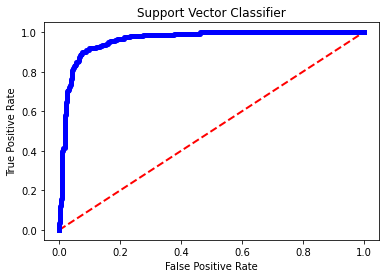

In [117]:
plt.plot([0, 1], [0, 1], 'k--', color = 'red', lw = 2)
plt.plot( fpr, tpr, color = 'b', lw = 5, label = 'ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Classifier')
plt.show()

In [118]:
auc_score = roc_auc_score(y_test, final_model.predict(x_test))
auc_score

0.8971906580356727

## Deploying the model :

In [119]:
import pickle

In [120]:
filename = 'winequality_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))

## Conclusion :

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_fit_svc)
# print(x_test.shape)
# print(y_test.shape)
load_model = pickle.load(open('winequality_model.pkl', 'rb'))
result = load_model.score(x_test, y_test)
print(result)

# 0.8975903614457831

0.8987951807228916


In [122]:
conclusion = pd.DataFrame()  # empty dataset

In [123]:
predicted_class = np.array(load_model.predict(x_test))
original_class = np.array(y_test)
# convert columns in to np.array 

In [124]:
print(predicted_class.shape)
print(original_class.shape)
print(x_test.shape)
print(y_test.shape)

# (830,)
# (830,)
# (830, 10)
# (830,)

(830,)
(830,)
(830, 10)
(830,)


In [125]:
conclusion = pd.DataFrame({'Original': original_class, 'predicted': predicted_class}, index = range(len(original_class)))

In [126]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
conclusion

Original  predicted
0           1          1
1           0          0
2           0          0
3           1          1
4           0          0
5           1          1
6           1          1
7           0          0
8           1          1
9           0          0
10          1          1
11          0          0
12          1          1
13          1          1
14          1          1
15          1          1
16          1          1
17          0          0
18          0          0
19          1          1
20          1          1
21          0          0
22          1          1
23          1          1
24          0          0
25          1          1
26          0          0
27          0          1
28          1          1
29          1          1
30          0          0
31          0          1
32          1          1
33          0          0
34          1          1
35          0          0
36          0          0
37          1          1
38          1          1
39          1          1
40          0          0
41          0          0
42          0          0
43          0          0
44          0          0
45          1          1
46          1          1
47          0          0
48          0          0
49          0          0
50          1          0
51          1          1
52          0          0
53          1          0
54          0          0
55          0          0
56          0          0
57          1          1
58          0          1
59          0          0
60          0          0
61          0          1
62          0          0
63          0          0
64          1          0
65          0          0
66          1          1
67          0          0
68          0          0
69          1          1
70          0          0
71          1          1
72          1          1
73          1          1
74          1          0
75          1          1
76          1          0
77          1          1
78          1          1
79          0          0
80          1          1
81          0          0
82          1          1
83          1          1
84          0          0
85          0          0
86          0          0
87          0          1
88          0          0
89          1          0
90          0          0
91          1          1
92          0          0
93          0          0
94          1          1
95          0          0
96          1          1
97          1          1
98          1          1
99          0          0
100         0          0
101         1          1
102         1          1
103         1          1
104         1          1
105         0          0
106         0          0
107         1          0
108         1          1
109         1          1
110         1          1
111         1          1
112         0          0
113         1          1
114         0          0
115         0          0
116         1          1
117         0          0
118         1          1
119         0          0
120         1          1
121         1          1
122         0          0
123         0          0
124         1          0
125         0          0
126         0          0
127         1          1
128         1          1
129         0          0
130         1          1
131         1          1
132         1          1
133         1          1
134         0          0
135         0          1
136         1          1
137         1          1
138         0          0
139         0          0
140         1          1
141         1          1
142         0          0
143         1          1
144         0          0
145         1          1
146         0          0
147         0          0
148         1          1
149         0          0
150         0          0
151         1          1
152         0          0
153         1          1
154         1          1
155         0          0
156         0          0
157         1          1
158         1          1
159  